Name:Nathan Clarke$\newline$
Student Number: 20387306

Import Packages

In [1]:
import numpy as np
import numpy.random as npr
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import random
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.ndimage import gaussian_filter
from skimage.transform import rescale
import warnings
import matplotlib.ticker as mtick
from sklearn.metrics import confusion_matrix,silhouette_score
from kmodes.kmodes import KModes
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")


# Question 1

## a)

Below I have loaded in the male_stud csv.

In [2]:
ms_data = pd.read_csv('male_stud.csv')

## b)

In [3]:
ms_data

,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences,final_grade
0,0,1,1,2,0,1,1,1,0,5,4,2,10,15
1,0,1,1,2,0,0,0,1,0,4,4,4,0,11
2,0,1,1,2,0,1,0,1,0,4,2,2,0,19
3,1,1,1,2,0,1,1,1,0,5,5,1,0,15
4,0,1,1,1,0,1,1,1,0,4,3,3,2,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0,1,1,2,2,1,0,0,0,5,5,4,11,9
183,0,1,2,1,0,0,0,1,0,2,4,5,3,16
184,1,0,1,1,3,0,0,0,0,5,5,3,3,7
185,0,0,3,1,0,0,0,1,0,4,4,1,0,10


There is data on 187 students in this cross-sectional dataset. For each student 14 indicators are recorded, below I have provided a short description of them:

1 large_fam - family size (binary: "0" - less or equal to 3 or "1" - greater than 3)$\newline$
2 lives_in_city - student's residence type (binary: "1" - urban area or "0" - rural area)$\newline$
3 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)$\newline$
4 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)$\newline$
5 failures - number of past class failures (numeric: n if 0<=n<3, else 4)$\newline$
6 paid - extra paid classes within the course subject (binary: yes or no)$\newline$
7 activities - extra-curricular activities (binary: yes or no)$\newline$
8 internet - Internet access at home (binary: yes or no)$\newline$
9 romantic - with a romantic relationship (binary: yes or no)$\newline$
10 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)$\newline$
11 freetime - free time after school (numeric: from 1 - very low to 5 - very high)$\newline$
12 goout - going out with friends (numeric: from 1 - very low to 5 - very high)$\newline$
13 absences - number of school absences (numeric: from 0 to 93)$\newline$
14 final_grade (numeric: from 0 to 20, output target)$\newline$$\newline$



I will now check for any missing values using the following code:

In [4]:
ms_data.isnull().sum()

large_family     0
lives_in_city    0
traveltime       0
studytime        0
failures         0
paid             0
activities       0
internet         0
romantic         0
famrel           0
freetime         0
goout            0
absences         0
final_grade      0
dtype: int64

As you can see there are no missing values for any indicator in the dataset.

## c)

In order to carry out exploratory data analysis of this dataset I will use numerical and graphical summaries of the data. For each a numerical summary I will generate a table of summary statistics. For each graphical summary I will use histograms.

### large_family

count    187.000000
mean       0.668449
std        0.472034
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: large_family, dtype: float64


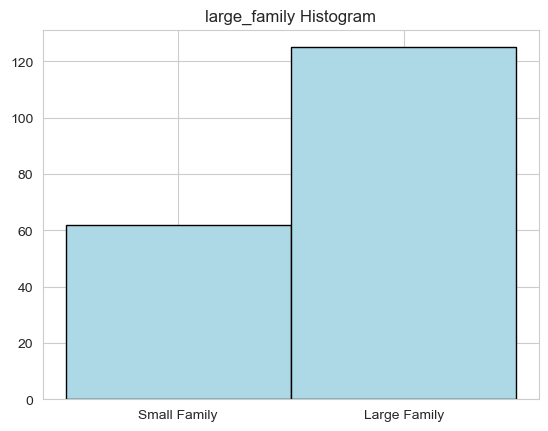

In [5]:
col = 'large_family'
data = ms_data[col]
print(data.describe())
plt.hist(data, bins=[-0.5, 0.5, 1.5], edgecolor='black',color = 'lightblue')  
plt.title(f'{col} Histogram')
plt.xticks([0,1],['Small Family', 'Large Family'])
plt.show()

As you can see from the above summaries, most of the students in the male_stud dataset come from a large family. This is evident from the larger bar for the 1 value of the variable (Large Family). Since this is a binary variable the mean of the distribution indicates the proportion of students who have a large family. So it is clear that 66.85% of students come from a large family (greater than 3) while 33.15% come from a small family (less than or equal to 3).

### lives_in_city

count    187.000000
mean       0.764706
std        0.425321
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: lives_in_city, dtype: float64


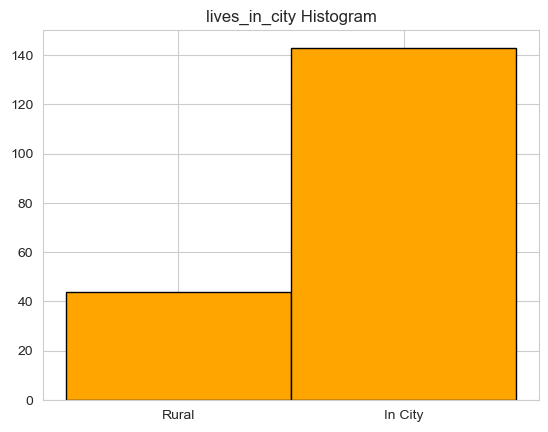

In [6]:
col = 'lives_in_city'
data = ms_data[col]
print(data.describe())
plt.hist(data, bins=[-0.5, 0.5, 1.5], edgecolor='black',color = 'orange')  
plt.title(f'{col} Histogram')
plt.xticks([0,1],['Rural', 'In City'])
plt.show()

As you can see from the above summaries, most of the students in the male_stud dataset live in the city. This is evident from the larger bar for the 1 value of the variable (In City). Since this is a binary variable the mean of the distribution indicates the proportion of students who live in the city. So it is clear that 76.47% of students live in the city (urban area) while 23.53% come from a rural area.

### traveltime 

count    187.000000
mean       1.491979
std        0.750405
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64


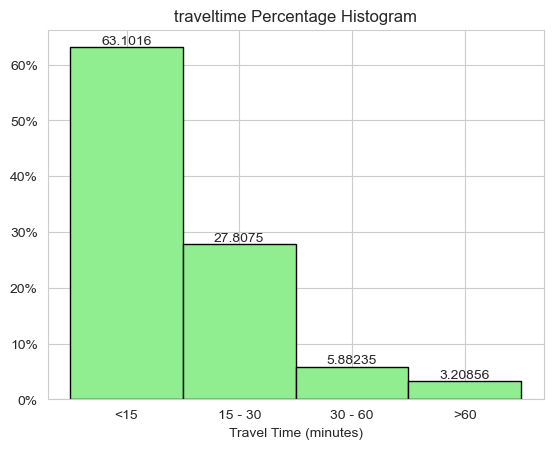

In [7]:
col = 'traveltime'
data = ms_data[col]
print(data.describe())
counts, edges, bars = plt.hist(data, bins=[0.5, 1.5, 2.5, 3.5, 4.5], edgecolor='black',color = 'lightgreen',\
         weights=(np.ones(len(data)) / len(data))*100)  #presenting the number of observations as percentages
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter()) #making the y-axis percentage values
plt.title(f'{col} Percentage Histogram')
plt.xticks([1,2,3,4],['<15','15 - 30','30 - 60','>60'])
plt.xlabel('Travel Time (minutes)')
plt.bar_label(bars)
plt.show()

As the values of 'traveltime' refer to ranked groupings of time, the mean and standard deviation do not have a meaningful interpretation. So order to describe this variable like I did for the binary variables I have presented a histogram which shows the percentage of observations in each category. As you can see it takes 63.1% of students less than 15 minutes to get to school, a further 27.81% arrive in 15-30 minutes. 5.88% of students arrive in 30-60 minutes and it takes the final 3.21% greater than 1 hour to get the school. So as you can see more than 90% of students spend 30 minutes or less getting to school. So it is clear that the relationship is skewed to the left.

### studytime 

count    187.000000
mean       1.764706
std        0.808713
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64


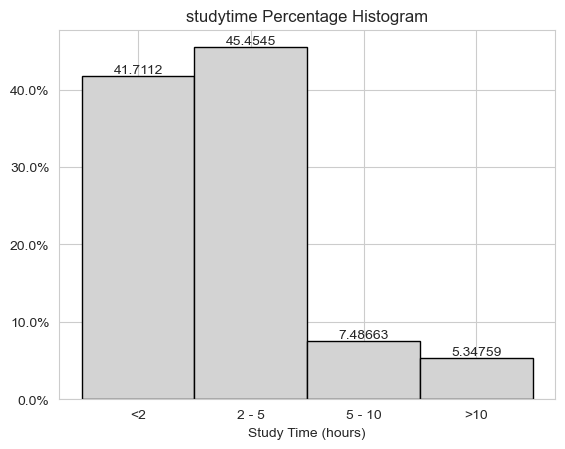

In [8]:
col = 'studytime'
data = ms_data[col]
print(data.describe())
counts, edges, bars = plt.hist(data, bins=[0.5, 1.5, 2.5, 3.5, 4.5], edgecolor='black',color = 'lightgrey',\
         weights=(np.ones(len(data)) / len(data))*100)  #presenting the number of observations as percentages
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter()) #making the y-axis percentage values
plt.title(f'{col} Percentage Histogram')
plt.xticks([1,2,3,4],['<2','2 - 5','5 - 10','>10'])
plt.xlabel('Study Time (hours)')
plt.bar_label(bars)
plt.show()

As the values of 'studytime' refer to ranked groupings of time, I have presented the same summaries as the traveltime variable. As you can see 41.7% of students spend less than 2 hours studying per week, a further 45.45% spend between 2 and 5 hours. 7.49% of students spend between 5 and 10 hours studying each week and the final 5.35% spend more than 10 hours. So it is clear that the relationship is skewed to the left.

### failures

count    187.000000
mean       0.368984
std        0.788152
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64


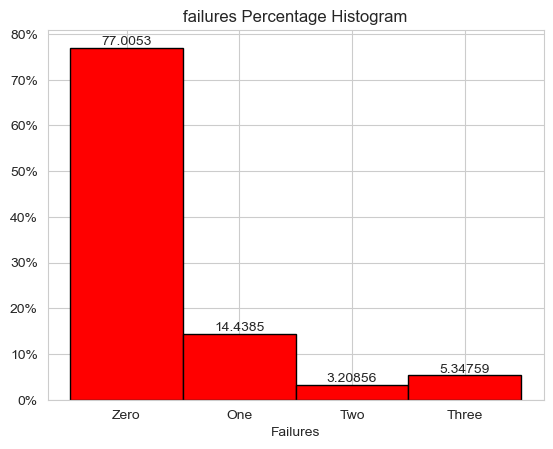

In [9]:
col = 'failures'
data = ms_data[col]
print(data.describe())
counts, edges, bars = plt.hist(data, bins=[-0.5,0.5, 1.5, 2.5, 3.5], edgecolor='black',color = 'red',\
         weights=(np.ones(len(data)) / len(data))*100)  #presenting the number of observations as percentages
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter()) #making the y-axis percentage values
plt.title(f'{col} Percentage Histogram')
plt.xticks([0,1,2,3],['Zero','One','Two','Three'])
plt.xlabel('Failures')
plt.bar_label(bars)
plt.show()

This variable represents the number of failures a student has had. It is a numeric variable which is counts failures up to 3 and for any number of failures greater than this, a 4 is assigned. However I found no fours in this data so I conclude that it simply counts the number of failures. A very large portion (77%) of students had zero failures, 14.44% had one failure and a total of 5.54% of students had either two or three failures. The mean number of mistakes was 0.37 while the median was 0, so this is a right skewed distribution.

### paid

count    187.000000
mean       0.390374
std        0.489144
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: paid, dtype: float64


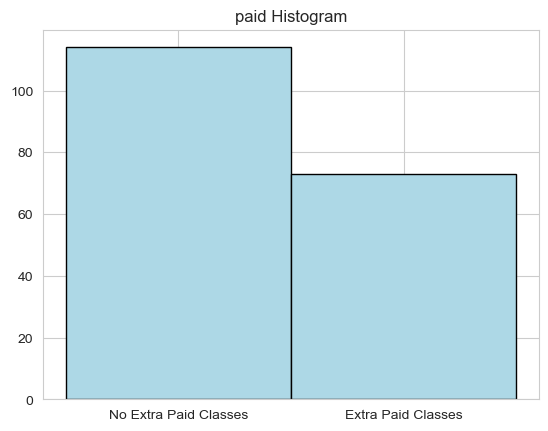

In [10]:
col = 'paid'
data = ms_data[col]
print(data.describe())
plt.hist(data, bins=[-0.5, 0.5, 1.5], edgecolor='black',color = 'lightblue')  
plt.title(f'{col} Histogram')
plt.xticks([0,1],['No Extra Paid Classes', 'Extra Paid Classes'])
plt.show()

As you can see from the above summaries, most of the students in the male_stud dataset do not take extra paid classes. This is evident from the larger bar for the 0 value of the variable (No Extra Paid Classes). Since this is a binary variable the mean of the distribution indicates the proportion of students who do pay for extra classes (the 1 value). So it is clear that 39.04% of students pay for extra classes, while 60.96% do not.

### activities

count    187.000000
mean       0.561497
std        0.497536
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: activities, dtype: float64


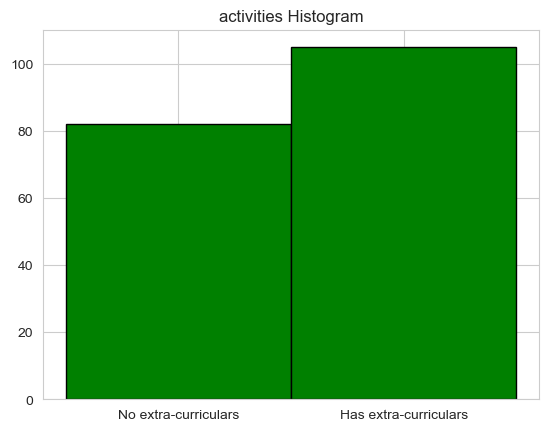

In [11]:
col = 'activities'
data = ms_data[col]
print(data.describe())
plt.hist(data, bins=[-0.5, 0.5, 1.5], edgecolor='black',color = 'green')  
plt.title(f'{col} Histogram')
plt.xticks([0,1],['No extra-curriculars', 'Has extra-curriculars'])
plt.show()

As you can see from the above summaries, most of the students in the male_stud dataset has extra-curricular activities. This is evident from the larger bar for the 1 value of the variable (Has extra-curriculars). Since this is a binary variable the mean of the distribution indicates the proportion of students who have extra-curricular activities. So it is clear that 56.15% of students have extra-curriculars while 43.85% do not.

### internet 

count    187.000000
mean       0.850267
std        0.357767
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: internet, dtype: float64


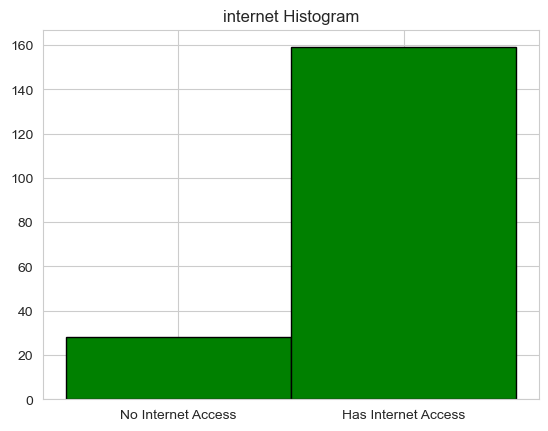

In [12]:
col = 'internet'
data = ms_data[col]
print(data.describe())
plt.hist(data, bins=[-0.5, 0.5, 1.5], edgecolor='black',color = 'green')  
plt.title(f'{col} Histogram')
plt.xticks([0,1],['No Internet Access', 'Has Internet Access'])
plt.show()

As you can see from the above summaries, most of the students in the male_stud dataset have internet access. This is evident from the larger bar for the 1 value of the variable (Has Internet Access). Since this is a binary variable the mean of the distribution indicates the proportion of students who have internet access. So it is clear that 85.03% of students have internet access while 14.97% do not.

### romantic

count    187.000000
mean       0.283422
std        0.451870
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: romantic, dtype: float64


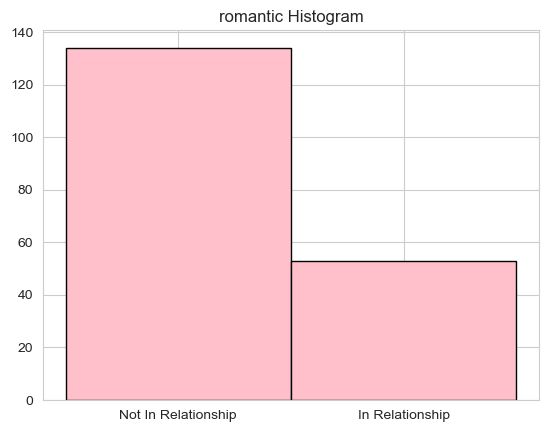

In [13]:
col = 'romantic'
data = ms_data[col]
print(data.describe())
plt.hist(data, bins=[-0.5, 0.5, 1.5], edgecolor='black',color = 'pink')  
plt.title(f'{col} Histogram')
plt.xticks([0,1],['Not In Relationship', 'In Relationship'])
plt.show()

As you can see from the above summaries, most of the students in the male_stud dataset are not in a romantic relationship. This is evident from the larger bar for the 0 value of the variable (Not In Relationship). Since this is a binary variable the mean of the distribution indicates the proportion of students who are in a relationship. So it is clear that 28.34% of students are not in a romantic relationship while 71.66% are.

### famrel 

count    187.000000
mean       4.000000
std        0.898027
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64


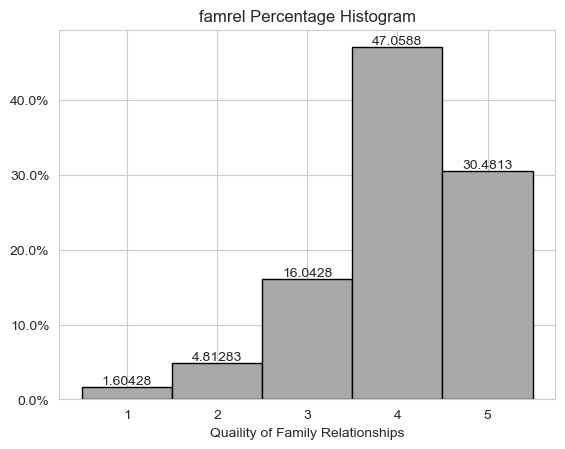

In [14]:
col = 'famrel'
data = ms_data[col]
print(data.describe())
counts, edges, bars = plt.hist(data, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black',color = 'darkgrey',\
         weights=(np.ones(len(data)) / len(data))*100)  #presenting the number of observations as percentages
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter()) #making the y-axis percentage values
plt.title(f'{col} Percentage Histogram')
plt.xticks([1,2,3,4,5])
plt.xlabel('Quaility of Family Relationships')
plt.bar_label(bars)
plt.show()

As the values of 'famrel' refer to ranked groupings of quaility, I will approach it in the same way I approached failures, studytime and traveltime using a histogram to display the percentage of students in each category. As you can see 6.41% of students have would rank their family relationship as a 1 or a 2 on a scale of 1-5 where one is very bad and 5 is very good. A further 16.04% would rank their family relationship a 3. The two most selected categories were 4 and 5 with 47.06% and 30.48% respectively. It is also important to note that the overall mean rank of family relationship was 4 out of 5..

### freetime 

count    187.000000
mean       3.486631
std        1.001924
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64


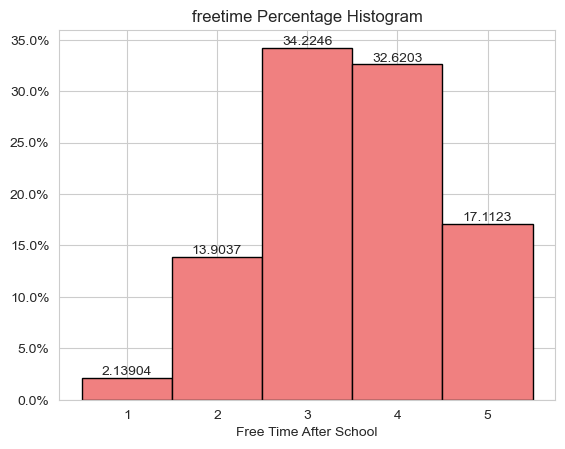

In [15]:
col = 'freetime'
data = ms_data[col]
print(data.describe())
counts, edges, bars = plt.hist(data, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black',color = 'lightcoral',\
         weights=(np.ones(len(data)) / len(data))*100)  #presenting the number of observations as percentages
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter()) #making the y-axis percentage values
plt.title(f'{col} Percentage Histogram')
plt.xticks([1,2,3,4,5])
plt.xlabel('Free Time After School')
plt.bar_label(bars)
plt.show()

This variable is how the students ranked their free time on a scale of 1-5 where 1 is very low and 5 is very high. A very small portion (2.14%) of students ranked their free time as a 1 out of 5, while the other ranks seemed to be more symmetric around the mean rank of 3.48. 13.9% of students ranked their free time a 2 out of 5 and 17.11% ranked it a 5 out of 5. The remaining 66.84% ranked their free time as 3 or 4 out of 5. This distribution appears to be more symmetric that the previous ranked variables but is it still skewed to the right as the mean rank(3.49) is greater than the median (3).

### goout

count    187.000000
mean       3.197861
std        1.135164
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64


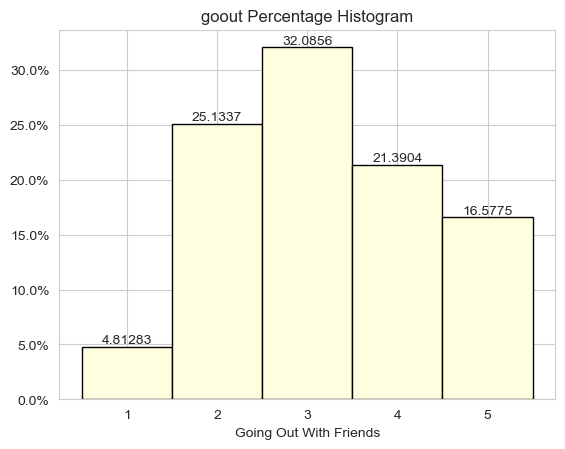

In [16]:
col = 'goout'
data = ms_data[col]
print(data.describe())
counts, edges, bars = plt.hist(data, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black',color = 'lightyellow',\
         weights=(np.ones(len(data)) / len(data))*100)  #presenting the number of observations as percentages
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter()) #making the y-axis percentage values
plt.title(f'{col} Percentage Histogram')
plt.xticks([1,2,3,4,5])
plt.xlabel('Going Out With Friends')
plt.bar_label(bars)
plt.show()

This variable describes how the students ranked how often they go out with friends on a scale of 1-5 where 1 is very low and 5 is very high. A very small portion (4.81%) of students ranked their free time as a 1 out of 5, while the other ranks seemed to be more symmetric around the mean rank of 3.198. 25.134% of students ranked their free time a 2 out of 5 and 16.578% ranked it a 5 out of 5. The remaining 53.48% ranked their free time as 3 or 4 out of 5. This distribution is to the right as the mean rank (3.197) is greater than the median (3).

The next 2 variables which I will explore are absences and final_grade. I will use summary statistics as well as boxplots to describe their distribution.

Absence summary statistics

count    187.000000
mean       5.144385
std        5.980749
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       38.000000
Name: absences, dtype: float64


final_grade summary statistics

count    187.000000
mean      10.914439
std        4.495297
min        0.000000
25%        9.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: final_grade, dtype: float64


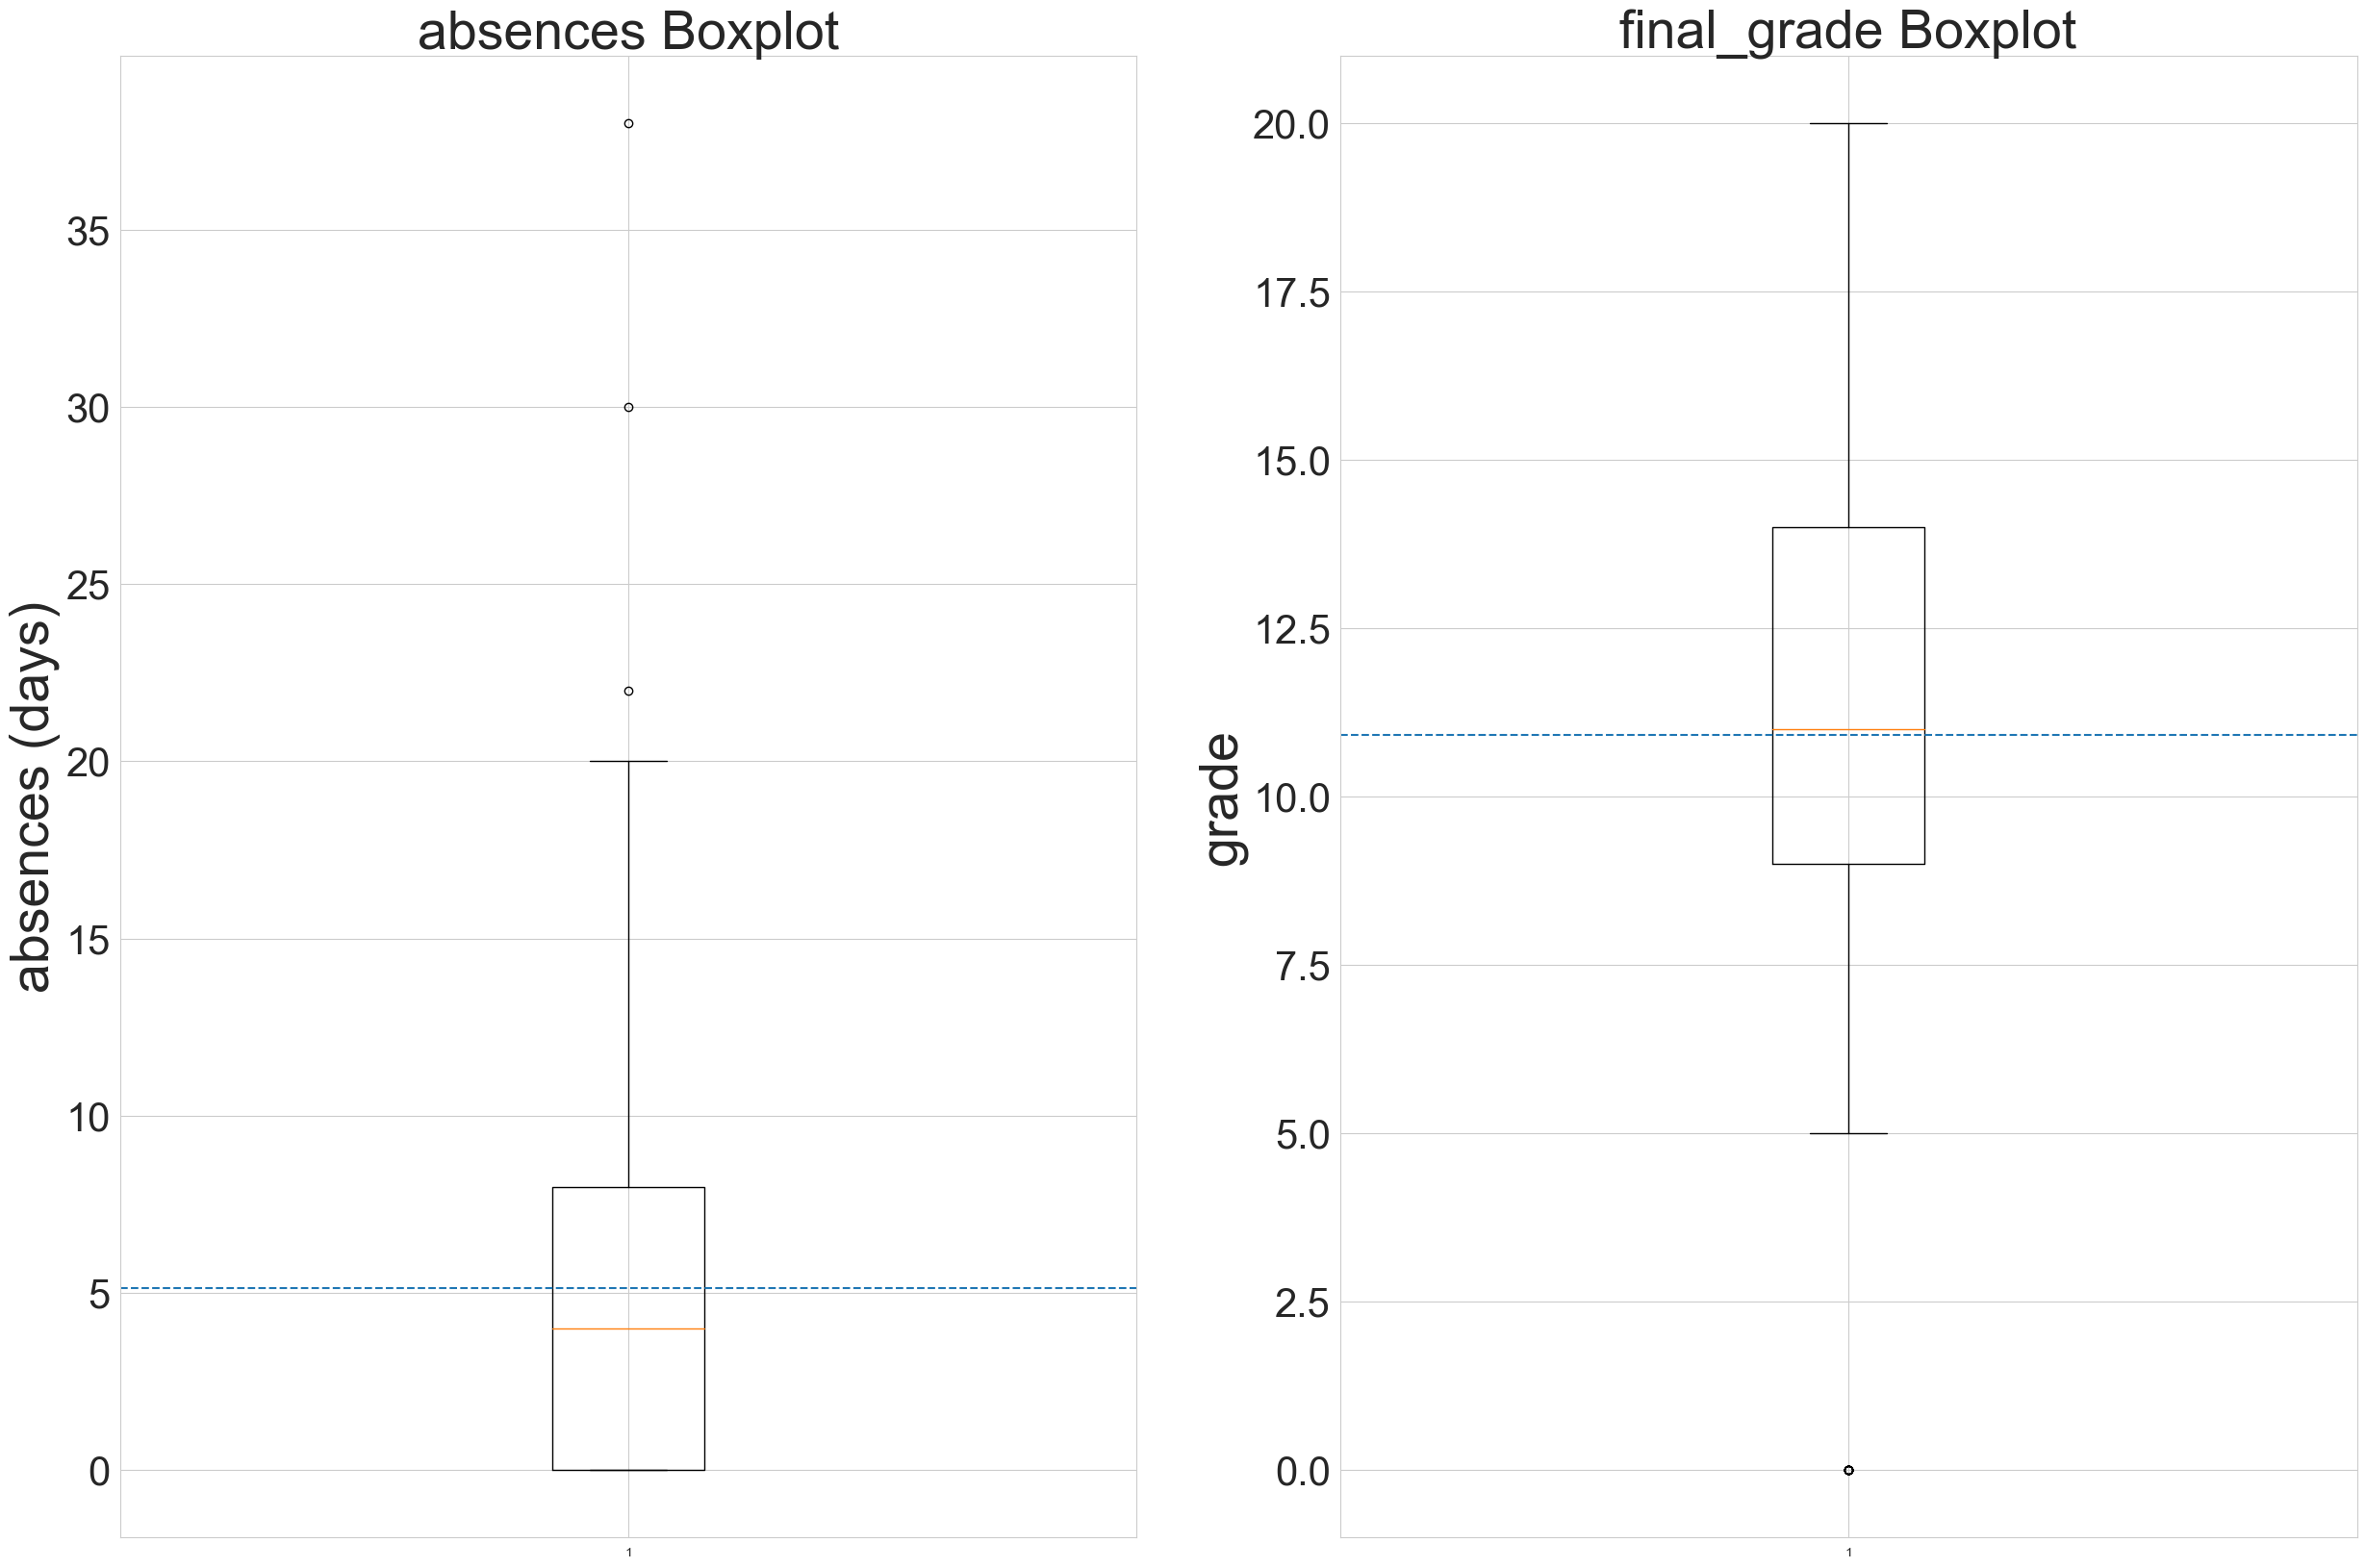

In [17]:
print('Absence summary statistics\n')
print(ms_data['absences'].describe())

print('\n\nfinal_grade summary statistics\n')
print(ms_data['final_grade'].describe())

plt.figure(figsize = (30,20))

plt.subplot(1,2,1)
plt.boxplot(ms_data['absences'])
plt.axhline(y=ms_data['absences'].mean(),linestyle = '--',label = 'Mean')
plt.title('absences Boxplot',fontsize=40)
plt.ylabel('absences (days)',fontsize=40) 
plt.tick_params(axis='y', labelsize=30)


plt.subplot(1,2,2)
plt.boxplot(ms_data['final_grade'])
plt.axhline(y=ms_data['final_grade'].mean(),linestyle = '--',label = 'Mean')
plt.title('final_grade Boxplot',fontsize=40)
plt.ylabel('grade',fontsize=40) 
plt.tick_params(axis='y', labelsize=30)

Note:

On both plots I have added a dotted line at the mean value of the data.

**absences**
The absences variable has a minimum value of 0 days and a maximum of 38 days. I will refer to the boxplot to discuss the distribution of the values between these points. As you can see, the data has an upper quartile of 8 days and a lower quartile of 0 days, meaning the lower 25% of students missed no days, while the upper 25% missed greater than 8 days. This gives the data an interquartile range (IQR) of 8 days. These two points are depicted by the beginning and end of the box. As you can see, the mean value is to the right of the median (line marked within the box), meaning that this distribution is right-skewed. It is possible that this right-skew results from the number of outliers on the plot. Above the upper whisker (1.5 times the length of the box, i.e. of the IQR), there are three observations considered to be outliers, the largest of these being the max value of the variable (38 days). The standard deviation of this dataset is 5.98; the average deviation from the mean is 5.98 days.


**final_grade**
The final_grade variable has a minimum value of 0 and a maximum value of 20; this is the range of possible scores for the student's final grade. I will refer to the boxplot to discuss the distribution of the values between these points. As you can see, the data has an upper quartile of 14 and a lower quartile of 9, meaning that the lower 25% of students got less than 9 for their final grade, while the upper 25% got more than 14. This gives the data an interquartile range (IQR) of 5. These two points are depicted by the beginning and end of the box. As you can see, the mean value is approximately equal to the median (line marked within the box), meaning that this distribution is approximately symmetric. In terms of outliers, there is one below the lower whisker (1.5 times the length of the box, i.e. of the IQR). This value is the minimum of the dataset and represents a student who scored 0 in their final grade. The standard deviation of this dataset is 4.49. Therefore, the average deviation from the mean is less than that of the absences variable.


# Question 2

## a)

Below I have loaded in the female_stud csv.

In [18]:
fs_data = pd.read_csv('female_stud.csv')

## b)

In [19]:
fs_data

,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences,final_grade
0,1,1,2,2,0,0,0,0,0,4,3,4,6,6
1,1,1,1,2,0,0,0,1,0,5,3,3,4,6
2,0,1,1,2,3,1,0,1,0,4,3,2,10,10
3,1,1,1,3,0,1,1,1,1,3,2,2,2,15
4,1,1,1,2,0,1,0,0,0,4,3,2,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,1,0,2,3,0,1,0,0,0,5,3,3,2,10
204,1,0,3,1,0,1,1,1,1,4,4,3,7,6
205,1,0,1,3,1,0,1,1,0,5,4,2,0,0
206,0,1,1,2,0,1,0,1,0,4,3,4,0,8


In [20]:
print(set(ms_data.columns == fs_data.columns))

{True}


There are observations on 208 students in the female_stud dataset, 21 more than in the male_stud dataset. However the indicators in both of the datsets are the same (see code above).$\newline$$\newline$ In order to check if this dataset also has no missing observations I have used the code below:

In [21]:
fs_data.isnull().sum()

large_family     0
lives_in_city    0
traveltime       0
studytime        0
failures         0
paid             0
activities       0
internet         0
romantic         0
famrel           0
freetime         0
goout            0
absences         0
final_grade      0
dtype: int64

As you can see this dataset also does not have any missing values.

## c)

Below I have carried out a two-sample t-test for each of the measurements at a 1% level of significance. I have displayed the t-stat and p-values in a table and highlighted any p-values less than our significance level. For any of the tests which have a p-value less than 1%, I reject the null hypothesis that the indicators are the same between the male and female dataset and instead conclude that they are different (alternative hypothesis).

In [22]:
t_stats = []
p_values = []
for col in ms_data.columns:
    t_stats.append(round(stats.ttest_ind(ms_data[col],fs_data[col])[0],5))
    p_values.append(round(stats.ttest_ind(ms_data[col],fs_data[col])[1],5))

summary_df = pd.DataFrame({'t_stats':t_stats,'p_values':p_values},index = ms_data.columns)

def highlight_max(column):
        if 'p_values' in column.name:
            return ['background-color: lightblue' if value < 0.01 else '' for value in column]
        
        else:
            return [''] * len(column)

styled_df = summary_df.style.apply(highlight_max, axis=0)

In [23]:
styled_df

,t_stats,p_values
large_family,-1.788680,0.074440
lives_in_city,-0.565300,0.572190
traveltime,1.186060,0.236320
studytime,-6.378010,0.000000
failures,0.881780,0.378440
paid,-2.581430,0.010200
activities,1.989050,0.047390
internet,0.875360,0.381910
romantic,-2.033140,0.042710
famrel,1.171090,0.242270


The t-statistic and p-value of the two sample t-test for the large_family variable were -1.78868 and 0.07444 respectively
The p-value of this test (0.07444) is greater than our significance level (0.01). Therefore I fail to reject the null hypothesis that there no difference in large_family between the two datasets.

The t-statistic and p-value of the two sample t-test for the lives_in_city variable were -0.5653 and 0.57219 respectively
The p-value of this test (0.57219) is greater than our significance level (0.01). Therefore I fail to reject the null hypothesis that there no difference in lives_in_city between the two datasets.

The t-statistic and p-value of the two sample t-test for the traveltime variable were 1.18606 and 0.23632 respectively
The p-value of this test (0.23632) is greater than our significance level (0.01). Therefore I fail to reject the null hypothesis that there no difference in traveltime between the two datasets.

The t-statistic and p-value of the two sample t-test for the studytime variable were -6.37801 and 0.0 respectively
The p-value of this test (0.0) is less than our significance level (0.01). Therefore I reject the null hypothesis that there no difference in studytime between the two datasets and conclude that there is a difference between the two samples

The t-statistic and p-value of the two sample t-test for the failures variable were 0.88178 and 0.37844 respectively
The p-value of this test (0.37844) is greater than our significance level (0.01). Therefore I fail to reject the null hypothesis that there no difference in failures between the two datasets.

The t-statistic and p-value of the two sample t-test for the paid variable were -2.58143 and 0.0102 respectively
The p-value of this test (0.0102) is greater than our significance level (0.01). Therefore I fail to reject the null hypothesis that there no difference in paid between the two datasets.

The t-statistic and p-value of the two sample t-test for the activities variable were 1.98905 and 0.04739 respectively
The p-value of this test (0.04739) is greater than our significance level (0.01). Therefore I fail to reject the null hypothesis that there no difference in activities between the two datasets.

The t-statistic and p-value of the two sample t-test for the internet variable were 0.87536 and 0.38191 respectively
The p-value of this test (0.38191) is greater than our significance level (0.01). Therefore I fail to reject the null hypothesis that there no difference in internet between the two datasets.

The t-statistic and p-value of the two sample t-test for the romantic variable were -2.03314 and 0.04271 respectively
The p-value of this test (0.04271) is greater than our significance level (0.01). Therefore I fail to reject the null hypothesis that there no difference in romantic between the two datasets.

The t-statistic and p-value of the two sample t-test for the famrel variable were 1.17109 and 0.24227 respectively
The p-value of this test (0.24227) is greater than our significance level (0.01). Therefore I fail to reject the null hypothesis that there no difference in famrel between the two datasets.

The t-statistic and p-value of the two sample t-test for the freetime variable were 4.87386 and 0.0 respectively
The p-value of this test (0.0) is less than our significance level (0.01). Therefore I reject the null hypothesis that there no difference in freetime between the two datasets and conclude that there is a difference between the two samples

The t-statistic and p-value of the two sample t-test for the goout variable were 1.50896 and 0.13211 respectively
The p-value of this test (0.13211) is greater than our significance level (0.01). Therefore I fail to reject the null hypothesis that there no difference in goout between the two datasets.

The t-statistic and p-value of the two sample t-test for the absences variable were -1.33045 and 0.18414 respectively
The p-value of this test (0.18414) is greater than our significance level (0.01). Therefore I fail to reject the null hypothesis that there no difference in absences between the two datasets.

The t-statistic and p-value of the two sample t-test for the final_grade variable were 2.06199 and 0.03987 respectively
The p-value of this test (0.03987) is greater than our significance level (0.01). Therefore I fail to reject the null hypothesis that there no difference in final_grade between the two datasets.


So overall there were only two variables for which I fail to reject the null hypothesis of the t-test. These variables are studytime and freetime. So I can conclude that aside from time spent studying and quaility of free time, there is no difference in the other metrics for the students between the male and female datasets.

# Question 3

## a)

Below I have combined the male and female student datasets into one dataframe using concat and reset the index.

In [24]:
data = pd.concat([ms_data,fs_data]).reset_index(drop = True)

In [25]:
data

,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences,final_grade
0,0,1,1,2,0,1,1,1,0,5,4,2,10,15
1,0,1,1,2,0,0,0,1,0,4,4,4,0,11
2,0,1,1,2,0,1,0,1,0,4,2,2,0,19
3,1,1,1,2,0,1,1,1,0,5,5,1,0,15
4,0,1,1,1,0,1,1,1,0,4,3,3,2,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,0,2,3,0,1,0,0,0,5,3,3,2,10
391,1,0,3,1,0,1,1,1,1,4,4,3,7,6
392,1,0,1,3,1,0,1,1,0,5,4,2,0,0
393,0,1,1,2,0,1,0,1,0,4,3,4,0,8


## b)

Now that the datasests have been combined into one dataframe I will use a heatmap applied to a correlation matrix for the variables in order to visualize the most correlated variables. Below I have presented the correlation matrix with a heatmap applied:

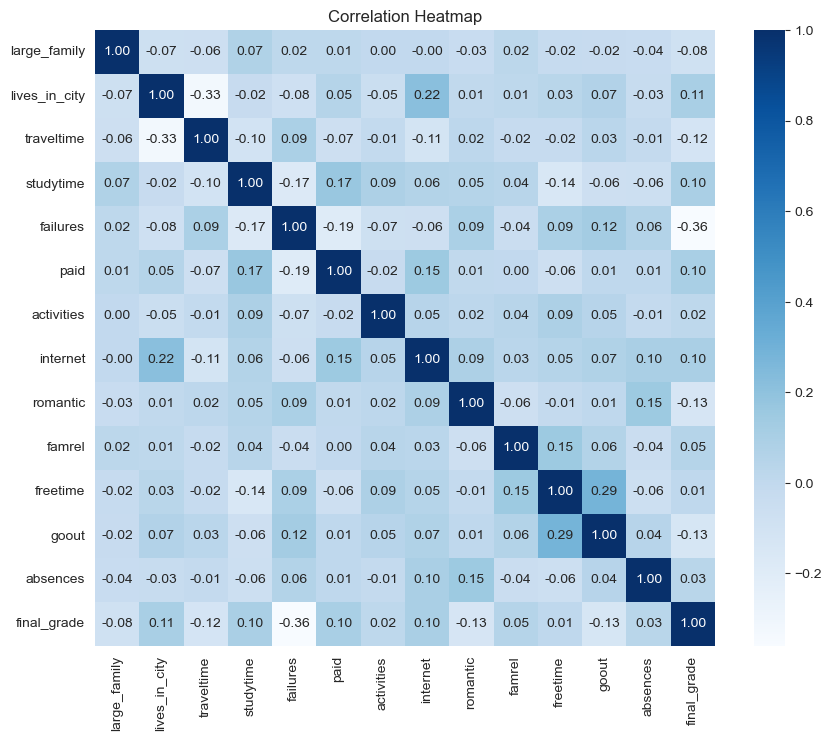

In [56]:
corr_mtx = data.corr() #correlation matrix between all variables in the dataset

plt.figure(figsize=(10, 8)) #setting a plt figure

sns.heatmap(corr_mtx, cmap='Blues', annot=True, fmt=".2f") #applying a heatmap to the correlation matrix and rounding to 2dp
plt.title('Correlation Heatmap')
plt.show()

As you can see here the lowest values are the lightest blue and the highest values are the darkest blue. Ofcourse all values on the diagonal are 1 as the indicators have a correlation of 1 with themselves. So to find the values with the highest correlation (both positive and negative) I am looking for cells which seem relatively bright (high positive correlation) and relatively dark (high negative correlation). Immediately I can spot that the highest negative correlation is between final_grade and failures. The second highest negative correlation seems to be between traveltime and lives_in_city. In terms of the highest positive correlation, I believe goout and freetime has the largest positive value. It also appears that internet and lives_in_city has the 2nd largest positive correlation.$\newline$$\newline$

In order to be sure of my selection I have unstacked the correlation matrix and sorted by the absolute value (so to not exclude the high negative correlations) of the values. I have also dropped duplicate values as Corr(A,B) = Corr(B,A). Below you can see the code and output. (I removed the first value of the dataframe as it was a diagonal entry)

In [27]:
sorted_correlations = abs(corr_mtx).unstack().sort_values(ascending = False).drop_duplicates()[1:]
best_4 = sorted_correlations.iloc[:4]
print(best_4)

final_grade    failures         0.360415
traveltime     lives_in_city    0.328096
goout          freetime         0.285019
lives_in_city  internet         0.216842
dtype: float64


This output confirms the values which I spotted from the heatmap of the correlation matrix. So to conclude the four most strongly correlated pairs are:$\newline$$\newline$
1) final_grade and failures (correlation of -0.360415)$\newline$
2) traveltime and lives_in_city (correlation of -0.328096)$\newline$
3) goout and freetime (correlation of 0.285019)$\newline$
4) lives_in_city and internet (correlation of 0.216842)$\newline$


## c)

Below I have produced scatter plots for the four most strongly correlated pairs which I found in part b:

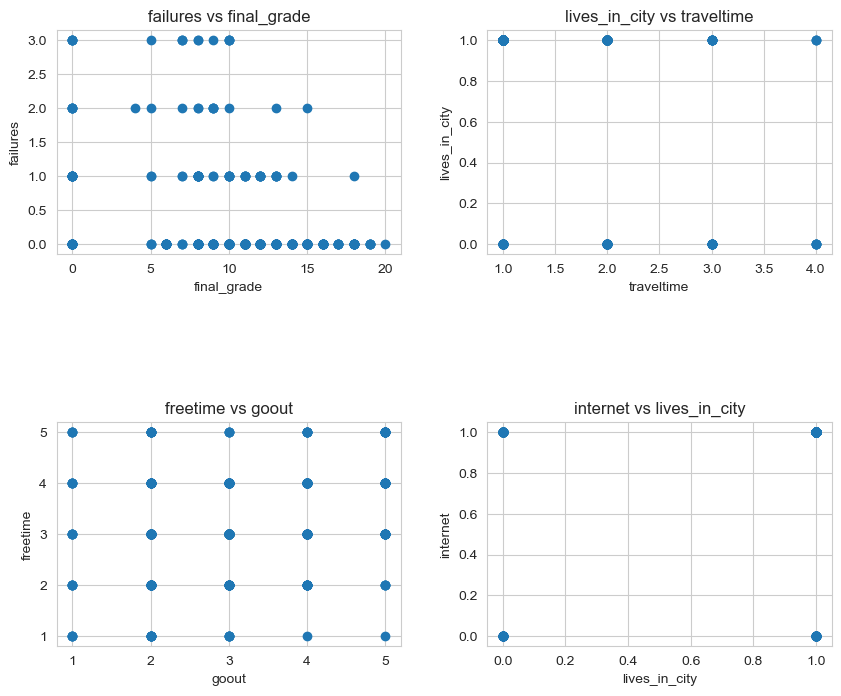

In [28]:
plt.figure(figsize = (10,8))

for i,(variable_1,variable_2) in enumerate(best_4.index):
    
    plt.subplot(2,2,i+1)
    plt.scatter(data[variable_1],data[variable_2])
    plt.xlabel(variable_1)
    plt.ylabel(variable_2)
    plt.title(f'{variable_2} vs {variable_1}')


plt.subplots_adjust(hspace=0.75)  #adding vertical space between plots
plt.subplots_adjust(wspace=0.25)  #adding horizontal space between plots

As you can see it is quite difficult to visualize the relationship between these variables using scatter plots as their values refer to ranked groupings. In order to try to visualize the relationships described by the correlation coefficients I have produced a bar chart for each pair, displaying the percentage of students in one group as another variable changes.

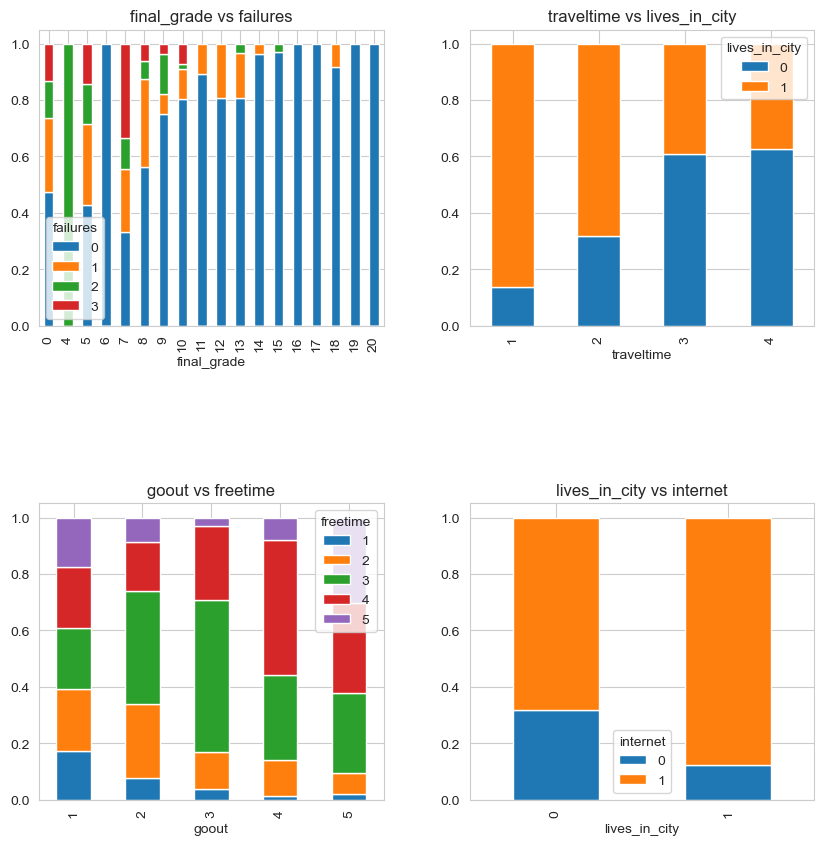

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
for i,(variable_1,variable_2) in enumerate(best_4.index):
    axes_flat = axes.flatten()
    cross_tab = pd.crosstab(index = data[variable_1],columns = data[variable_2],normalize="index")
    cross_tab.plot(kind = 'bar',stacked = True,ax = axes_flat[i])
    axes_flat[i].set_title(f'{variable_1} vs {variable_2}')

    
plt.subplots_adjust(hspace=0.6)  #adding vertical space between plots
plt.subplots_adjust(wspace=0.25)  #adding horizontal space between plots

From these plots it is easier to identify the relationship between the variables. Below I have discussed them one-by-one.

**failures and final_grade**
As you can see from the plot there appears to be a negative correlation between number of failures and final grade. It is clear that as final grade increases the percentage of students who had no failures (the non-blue areas) decreases dramatically. In fact for final grades of greater than 10 over 80% of students had no failures. This relationship is consistent with the correlation coefficient observed in the previous part (-0.36).

**lives_in_city and traveltime**
Similarly for traveltime and lives_in_city, there is a clear negative correlation. From the plot you can see that as travel time increases the percentage of students who live in the city (orange) is steadily decreasing (beginning at over 80% and finishing below 40%). This is consistent with the correlation coefficient observed in the previous part (-0.328).


**freetime and goout**
It is clear from the goout vs freetime plot that the percentage of people who have high levels of freetime increases among students who go out a lot. Graphically you can see that as the categories of goout increase the size of the red and purple bars (4 and 5 for freetime) increase in size, while the blue and orange bars (1 and 2 for freetime) decrease. This relationship is consistent with the positive correlation found in part b (0.285).


**internet and lives_in_city**
From the lives_in_city vs internet plot there appear to be a postive correlation between living in the city and having internet access at home. From the plot it is clear that the percentage of people live in the city that have internet access is higher when compared the people who do not live in the city, so there is an increase in internet access when people live in the city compared to people who live rurally. This is consistent with the positive correlation found between these variables in the previous part (0.217)

# Question 4

## a)

In the code below I have used list comprehension to add a new binary variable to the dataset. The pass column has a value of 1 if the final_grade column is greater than or equal to 10 and 0 if it is less than 10.

In [30]:
q4_data = data.copy()
q4_data['pass'] = [1 if grade>=10 else 0 for grade in q4_data['final_grade']]

In [31]:
q4_data

,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences,final_grade,pass
0,0,1,1,2,0,1,1,1,0,5,4,2,10,15,1
1,0,1,1,2,0,0,0,1,0,4,4,4,0,11,1
2,0,1,1,2,0,1,0,1,0,4,2,2,0,19,1
3,1,1,1,2,0,1,1,1,0,5,5,1,0,15,1
4,0,1,1,1,0,1,1,1,0,4,3,3,2,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,0,2,3,0,1,0,0,0,5,3,3,2,10,1
391,1,0,3,1,0,1,1,1,1,4,4,3,7,6,0
392,1,0,1,3,1,0,1,1,0,5,4,2,0,0,0
393,0,1,1,2,0,1,0,1,0,4,3,4,0,8,0


## b)

Below I have separated the data into response ('pass') and predictor (all others apart from final_grade) variables. I have also standardised the predictor variables.

In [32]:
y = q4_data['pass']
X_raw = q4_data.iloc[:,:-2] #removing final_grade and pass
X = (X_raw - X_raw.mean())/(X_raw.std()) #standardising

## c)

Below I will fit a logistic regression model to the data and interpret the model fit.

Note:

I add an intercept to the predictor variables.

In [33]:
X.insert(0,'intercept',1) 
fit = sm.Logit(y,X).fit()
print(fit.summary())

Optimization terminated successfully.
         Current function value: 0.556201
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   pass   No. Observations:                  395
Model:                          Logit   Df Residuals:                      381
Method:                           MLE   Df Model:                           13
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                  0.1221
Time:                        22:48:07   Log-Likelihood:                -219.70
converged:                       True   LL-Null:                       -250.25
Covariance Type:            nonrobust   LLR p-value:                 3.330e-08
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         0.7801      0.118      6.602      0.000       0.548       1.012
large_family     -0.

**Model and Fit Information**

Here, we have a logistic regression model for 'pass' fit on 395 observations with 13 explanatory variables and an intercept. In the top part of the table, important model fit metrics such as pseudo-R-squared can be seen. Pseudo R-squared is a metric used to quantify the proportion of variance in the dependent variable (pass) explained by the variation in the independent variables. Another measure of fit described in the output is the Log-Likelihood of the regression, this is the value of the the log-likelihood function optimized using the maximum likelihood estimator. This metric does not have an interpretation as the pseudo-r-squared does. Instead, its main functionality is in comparing the fit of different models for the same dependent variable. I also note that the coefficients of the regression were calculated using maximum likelihood estimation; this results in a z-statistic for the coefficients rather than the usual t-statistic seen in OLS estimation.
 
**Coefficients**

In the coefficients selection of the regression output, you can see the estimated coefficients for each independent variable and the value of the intercept. By looking at the p-values of these coefficients I see that only 3 of these coefficients are statistically significant (different from zero) at a 5% level, these are:

intercept - 0.7801

failures - -0.6692

goout - -0.4254


**Interpretation**

Firstly, the intercept of the model represents the log-odds ( $log(\frac{P(pass = 1)}{1-P(pass = 1)})$ ) of the 'pass' variable when all of the predictor variables are zero. Then, each coefficient represents the marginal effect of an increase in the predictor variable on the log-odds. Therefore, for every 1 unit increase in failures, there will be a decrease of 0.6692 in the log-odds of the pass variable. Similarly for every 1 unit increase in goout there is a 0.4252 unit decrease in the log-odds of pass. In conclusion, as both of these coefficients are negative, as they increase (if they go out more and fail more), there is a decrease in the probability of the student passing the final exam. It is also clear that an increase in failures is responsible for a larger drop in the probability of passing than an increase in going out with friends.

**Misclassification Rate**

Below, I have written code to calculate the misclassification rate for this model. Here I have set the threshold to 0.5 so if the model predicts greater than a 50% probability of the grade being a pass then it is classified as a pass, otherwise it is a fail. As you can see this model has a 27.85% misclassification rate, so over 1/4 of the 'pass' variable was incorrectly classified.


In [34]:
predicted_probabilities = fit.predict(X)
predictions = np.where(predicted_probabilities > 0.5, 1, 0)

misclassification_rate = np.mean(predictions != y)
print(f'Misclassification Rate : {misclassification_rate}')

Misclassification Rate : 0.27848101265822783


## d)

In this part I will carry out forward selection for a logistic regression model using the AIC information criterion, ie I will be finding the model with the lowest AIC value.

In [35]:
def forward_AIC_selection(X,y):
    predictors = []
    best_pred = ''
    best_aic = float('inf')
    
    #while the best predictor has not yet been selected
    while best_pred == '':
        #looping for all predictors
        for pred in [predictor for predictor in X.columns if predictor not in predictors]:
            test_pred = predictors + [pred]
            X_subset = X[test_pred]
            
            #fitting the new model
            fit = sm.Logit(y, X_subset).fit(disp=False)  
            #getting AIC
            aic = fit.aic
            
            #checking if the new aic is better than the current best
            if aic < best_aic:
                best_aic = aic
                best_pred = pred

        #storing the best predictors
        if best_pred != '':
            predictors.append(best_pred)
            best_pred = ''
        else:
            break
           
    return {'Best AIC': best_aic, 'Predictors': predictors}


results = forward_AIC_selection(X,y)

#fitting the model with the selected predictor
best_model = sm.Logit(y, X[results['Predictors']]).fit(disp=False)
print(best_model.summary())
print(f'\nBest AIC : {best_model.aic}')

                           Logit Regression Results                           
Dep. Variable:                   pass   No. Observations:                  395
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                            2
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                  0.1053
Time:                        22:48:08   Log-Likelihood:                -223.90
converged:                       True   LL-Null:                       -250.25
Covariance Type:            nonrobust   LLR p-value:                 3.606e-12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7530      0.116      6.504      0.000       0.526       0.980
failures      -0.7187      0.129     -5.587      0.000      -0.971      -0.467
goout         -0.3547      0.118     -3.017      0.0

Above, I have displayed the output of the logistic regression model selected using forward selection on the model AIC. This model consists of an intercept, the failures and the goout variables. These were the three coefficients I found to be statistically significant in the previous part, so it is unsurprising that they generated a model with the lowest (best fit)  overall AIC value (453.8). 


**Fit Metrics**

The pseudo r-squared has slightly decreased. However, this is expected as adding extra independent variables increases the r-squared but could also introduce multicollinearity to the model (this could be checked using a metric such as the condition number). So, it is expected that removing variables would decrease it. The log-likelihood of this model is lower than the log-likelihood of the original model; this indicates that this model is a better fit than the original model.

**Coefficients**

There has been a slight change in the value of the coefficients from the original model to this one; however, the relationship of each to the 'pass' variable remains the same, with an increase in failures and goout leading to a decreased probability of passing. When compared to the original model you will see that there has been a slight decrease in intercept (0.78 -> 0.75), a increase in the goout coefficent (-0.4254 ->  -0.3547) and a decrease in the failures coefficient (-0.6692 -> 0.7187). I also note that all of the coefficients in this model are statistically significant at a 1% level.

**Misclassification Rate**

Below, I have calculated the misclassification rate for this model (using a threshold of 50%). As you can see, there is an improvement in misclassification from the original model (0.278 -> 0.268), but still, over 25% of all observations for the 'pass' variable were misclassified.


In [36]:
predicted_probabilities = best_model.predict(X[results['Predictors']])
predictions = np.where(predicted_probabilities > 0.5, 1, 0)

misclassification_rate = np.mean(predictions != y)
print(f'Misclassification Rate : {misclassification_rate}')

Misclassification Rate : 0.2683544303797468


# Question 5

## a)

I have decided to use the standard 75%,25% split for training and test data respectively. As the dataset has 395 rows I am setting my training set size to 295. I am then selecting the values of the training and testing sets at random.$\newline$$\newline$

Note: There are no common datapoints between the training and testing sets.


In [37]:
#selecting y variable
y = data['final_grade']
#selecting the predictors, removing final_grade
X = data.iloc[:,:-1]

I have set the response variable y to be the final_grade series and the predictor variables to be the rest of X.

In [38]:
train_size = 295
np.random.seed(1234) #setting seed so results can be reproduced

#selecting the random test and train datasets
train_select = np.random.permutation(range(len(y)))
X_train = X.iloc[train_select[:train_size],:].reset_index(drop=True)
X_test = X.iloc[train_select[train_size:],:].reset_index(drop=True)
y_train = y[train_select[:train_size]].reset_index(drop=True)
y_test = y[train_select[train_size:]].reset_index(drop=True)

## b)

Below I have fit a random forest with 10 trees and random_state = 101 to the training datasets:

In [39]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 101)
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=101)

To identify which variables are most important in predicting the final grade of a student, I have used the feature_importances_ function. Below I have presented the importances in a barchart and in a table (sorted from highest to lowest):

               Importance
absences         0.242718
failures         0.177126
freetime         0.124583
traveltime       0.084764
famrel           0.075051
goout            0.070691
studytime        0.057068
romantic         0.042203
activities       0.031054
internet         0.025160
large_family     0.023829
lives_in_city    0.023812
paid             0.021940


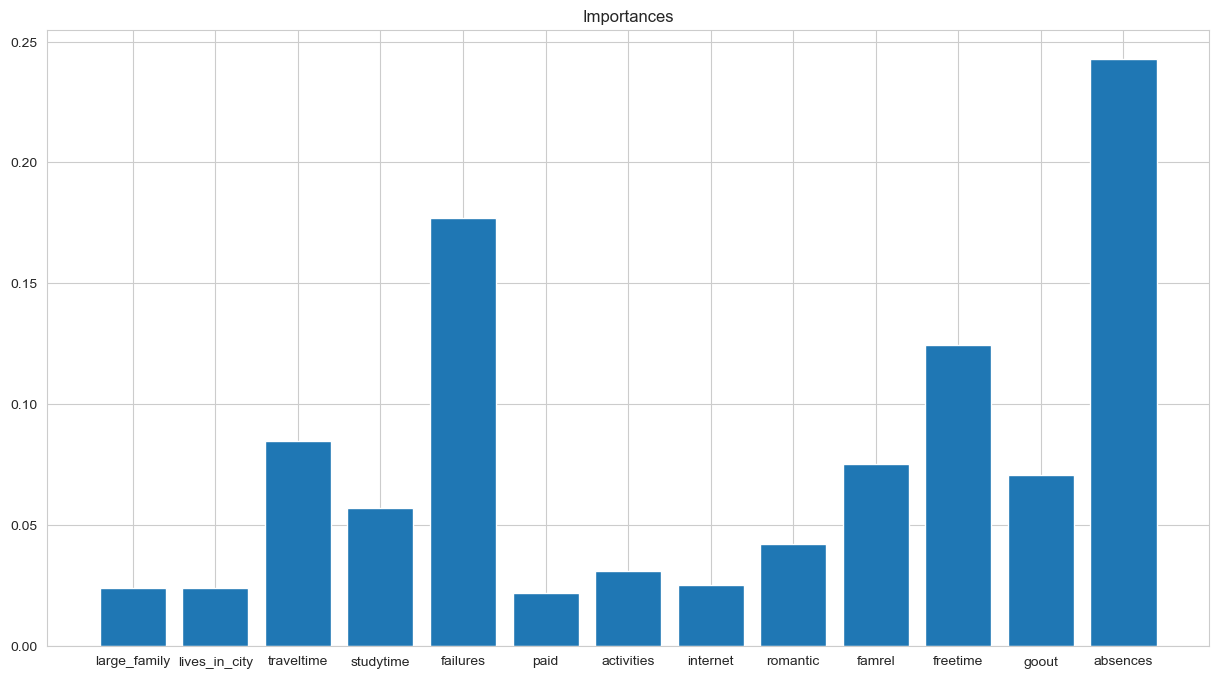

In [40]:
feature_importances = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['Importance'])
sorted_features = feature_importances.sort_values(by='Importance', ascending=False)
print(sorted_features)

feature_importances = rf.feature_importances_

plt.figure(figsize=(15, 8))
plt.bar(range(len(feature_importances)), feature_importances, align='center')
plt.xticks(range(len(feature_importances)),X_train.columns,size = 10)
plt.title('Importances')
plt.show()

As you can see from the bar chart and table, the three most important variables are absences, failures and freetime. Only one of these variables was selected by the forward selection in question 4 (failures). The other feature the forward AIC selected was goout, which ranks 6th in importance. So it seems that this process has found absences to be more important in predicting final grade than both of the features selected by the forward AIC, it also found failures,freetime, traveltime and famrel to be more important that the goout (the 2nd feature picked by the forward AIC).

So overall, it seems that the random forest regression finds variables that were not statistically significant in the logistic regression to be highly important for predicting final grade. There could be a few reasons for this disparity:

**Non-Linear Relationships**

The Random Forest Regression is a non-linear model, while the logistic regression is a purely linear model. Therefore, the random forest is possibly capturing more complex, non-linear relationships between the features and final grade which were not captured by the logistic regression. This would explain why many features were not statistically significant in the logistic regression but highly important in the random forest regression.

**Interaction of Variables**

The Random Forest Regression can also capture interactions between variables, which the logistic regression cannot. Therefore, in isolation, the variables may not have been important, explaining the insignificance in the logistic regression. However, the importance of a variable in the random forest regression is based on how much it contributes to increasing the information gain in the decision trees, so the interactions of one variable with another may make it important to the model.


## c)

Using the random forest fit in part b, I have generated a prediction of the final_grade test set and created a plot of the true vs the predicted values.

In [41]:
rf_final_grade_pred = rf.predict(X_test)

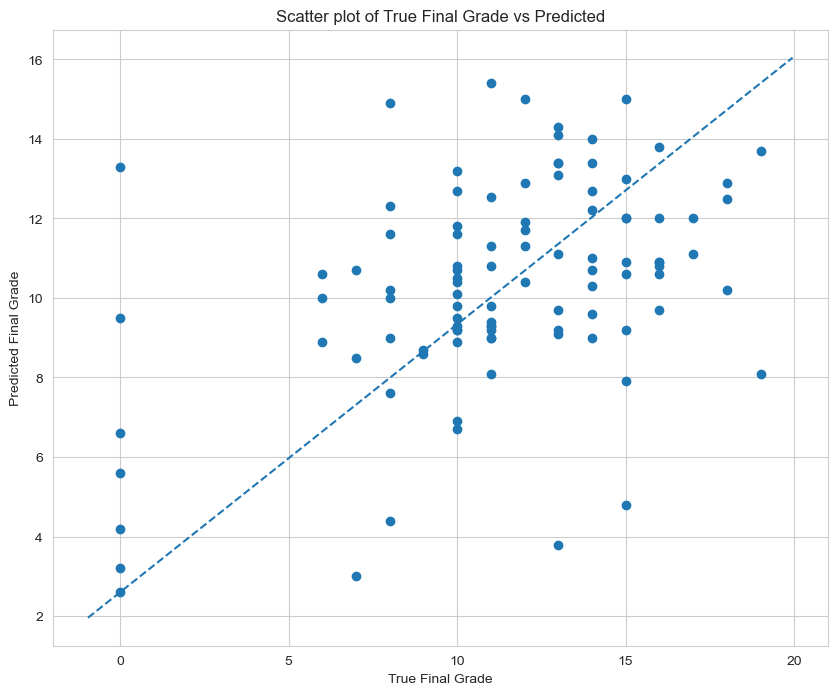

In [42]:
plt.figure(figsize = (10,8))
plt.scatter(y_test,rf_final_grade_pred)
plt.ylabel('Predicted Final Grade')
plt.xlabel('True Final Grade')
plt.title('Scatter plot of True Final Grade vs Predicted')
plt.plot(plt.xlim(), plt.ylim(), ls="--") #adding the dotted line
plt.show()

In the plot above, I have the true values of final grade on the x-axis and the predicted values on the y-axis. Therefore, if the random forest was predicting the true final grade well, I would expect the points on the scatter plot to hug the 45-degree line (if they were the same, the data point would be on the line), which I have added to the plot. While the data does seem to follow the line somewhat, it is very noisy and, in some cases, did a very poor job of predicting; for example, in the top left corner, I observed a data point where the true final grade was zero, but the model predicted a grade of 14.  So it seems that the features in our dataset are not very useful for predicting the final grade of a student. This is something that I have noticed in previous questions, for example the logisitic regression had a high misclassification rate and a low pseudo R-squared value. A possible reason for this could be the type of data present in the feature dataset. Given that many of the features in the dataset are ranked groups, the models may be struggling to find relationships between the features and final grade. If I could gather the data myself, I would try to reduce the number of grouped features; for example, instead of putting travel time into 15-minute buckets, I would leave it as a discrete numeric variable. I understand that, in many cases, it is easier for students to categorise features about themselves rather than giving specific values, but this has led to poor predictive ability from the feature dataset.

## d)

I will now fit random forest regressions with different numbers of trees (5,10,50,100,500,1000,5000) each time attempting to predicting the final grade of a student. I repeated each regression 20 times using a different random state each time.

Below I have defined a list of the different sizes of trees and a variable for the number of times the model fit and prediction will take place:

In [43]:
num_trees = [5,10,50,100,500,1000,5000]
num_repeats = 20

Below I have set a seed for my analysis so my overall results will be replicable. I have also defined a variable random_states which is a list of unique random values between 0 and 1000. This list has 20 elements signifying the number of repeats for each prediction. So I will use a for loop to access all of the values in this list and carry out a regression using the random values as the random_state arguement of the regression.

In [44]:
np.random.seed(1234)
random_states=random.sample(range(0,1000),num_repeats)

I will now define a function which given an input of tree size, will carry out the model fits and predictions for each element in the random_states list. Once the fit and prediction is complete, the MSE will be calculated for each regression and after all 20 repeats are finished the mean and standard deviation of the MSE's for that tree size will be returned.

In [45]:
def mean_mse(tree_size,rand_states = random_states):
    mses = []
    for rand_state in rand_states:
        rf = RandomForestRegressor(n_estimators = tree_size, random_state = rand_state)
        rf.fit(X_train,y_train)
        pred = rf.predict(X_test)
        mse = np.mean((pred-y_test)**2)
        mses.append(mse)
    mean = np.mean(mses)
    sd = np.std(mses)
    return mean,sd

I will now use the function for all tree sizes and store my results in a dataframe:

In [46]:
means = []
sds = []
for tree_size in num_trees:
    mean,sd = mean_mse(tree_size)
    means.append(mean)
    sds.append(sd)  

In [47]:
performance_df = pd.DataFrame({'means':means,'std':sds},index = num_trees)

In order to visualize this data I will use a plot with errorbars. I have plotted the average mean squared error vs the logged number of trees and use errorbars to represent the standard errors of each datapoint.

Text(0.5, 1.0, 'Performance of Random Forest Reg ression vs Log Number of Trees')

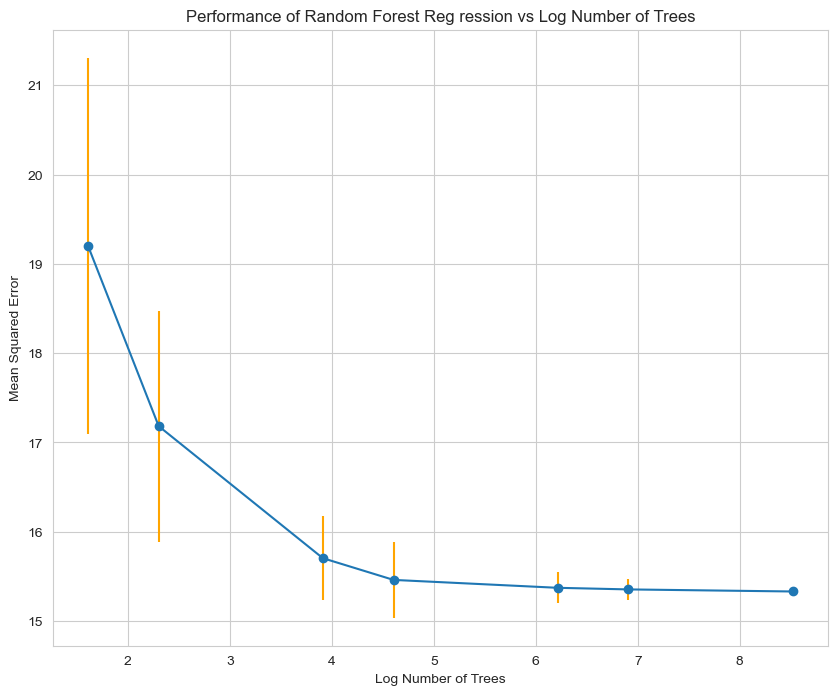

In [48]:
plt.figure(figsize = (10,8))
plt.errorbar(np.log(performance_df.index),performance_df.means,yerr = performance_df['std'].to_list(),fmt = 'o-',ecolor='orange')
plt.xlabel('Log Number of Trees')
plt.ylabel('Mean Squared Error')
plt.title('Performance of Random Forest Reg ression vs Log Number of Trees')


From the plot above, it is clear that as the number of trees increases, the mean squared error of the regression decreases, and so too does the standard error (the orange error bars) of the mean squared error. For the five-tree model, the mean and the mean squared errors were 18.97 with a standard error of 1.12, while for the 5000-tree model, the mean had dropped to 15.33 and the standard error to 0.05.

Although a large drop is observed in average MSE as the number of trees increases, there are clear diminishing marginal gains from increasing trees beyond 100. In fact, there is almost no change in mean MSE between 1000 trees (15.349) and 5000 trees (15.339). So, there appears to be a clear trade-off between runtime/model complexity and minimising MSE. In my opinion, there appears to be an 'elbow' (point at which the rest of the diminishing curve appears almost linear) at 100 trees. So, I believe 100 trees would give the best model performance with the fewest number of trees.

A similar effect can be observed in the size of the error bars (standard errors of the mean MSE). However, it seems that after 100 trees, the decrease in the bars becomes much smaller relative to the bars for models with less than 100 trees. So I am still happy that 100 trees appears to be the best choice for number of trees.


## e)

There are many reasons for running a random forest multiple times with different random states, I will explain some of these reasons below:

**Variance Reducation Through Averaging**

Random Forest regressions are an example of ensemble learning that reduces variance by averaging the predictions from multiple decision trees. The most important factor for a good random forest regression is the diversity among the trees, so by running the regression with different random states we create a diverse set of trees leading to a more robust set of tress which can better handle out-of-sample data.

**Model Stability**

By using different random states, different sets of trees are produced and thus different predictions and errors are generatered. So by fitting the model multiple times with different states, the stability of the parameters generated can be assessed. For example, above I looked at the Mean Squared Error which is and unbiased and consistent statistic. Therefore the more times a realization is generated (larger sample size) the smaller the variance of the distribution gets (variance converges to zero as n tends to infinity) so the mean of the distribution converges to the true population mean (as it is unbiased, so it is centered around the true mean).  

**Reduce Overfitting**

Running a random forest regression multiple times with different random states can help to reduce variability of results. By reducing the variatibity of the results, more clear patterns can be observed in the data which will help to reduce over fitting.


So overall the performance of a random forest model can be improved by running the regression multiple times with different random states.


# Question 6

## a)

Below I have run K-Means clustering for number of clusters in {1,2,...,10} and plotted the model performance vs the number of clusters. To quantify the model performance I have used two methods:

Inertia: This is the sum of squared distances between each datapoint in a cluster and the clusters mean, therefore the goal of K-Means is to minimize this using different cluster assignments and centroids (means). So, the performance of the model for different values of K can be analysed by comparing the inertia values.

Silhouette Score: The silhouette score is used to quantify the goodness of the clustering. It measures how similar a datapoint is to its own cluster relative to other clusters. Each datapoint is given a score and the average score of all datapoints is the silhouette score for the overall model. The values of this metric range from -1 to 1, where values near 1 indicate that the datapoint is a good fit to its cluster and values near -1 indicate that the datapoint would be better suited to another cluster. So a good model would have a high Silhouette Score.

Below I have plotted the Inertia values and Silhouette Scores across values of K.

Note:

When choosing the best value of inertia, it is useful to remember that intertia decreases as number of clusters increases, however so too does the complexity of the model. So similar to selecting the best number of trees in part 5, I will be looking for an 'elbow' point on the plot which would indicate the best model performace with the lowest number of clusters (complexity).

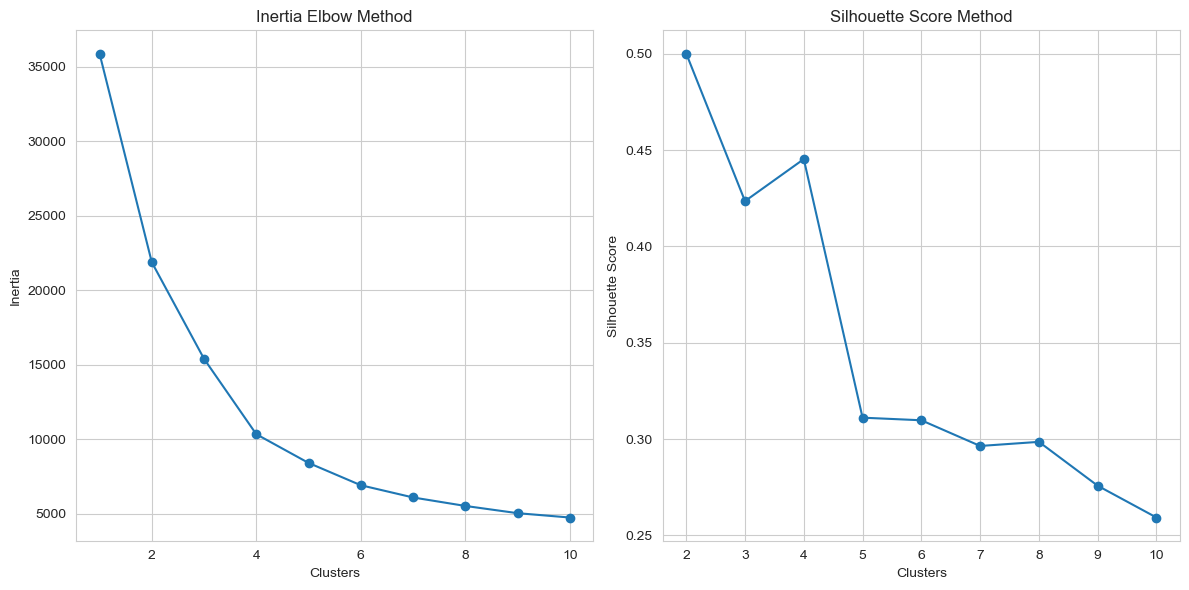

In [49]:
#using the full dataset, final_grade included
X = data.copy()

#Number of clusters
clusters = range(1, 11)

#Lists to store the performance metrics
inertias = []
silhouette_scores = []

#Calculating the performance metrics for all number of clusters
for k in clusters:
    # fitting model
    km = KMeans(n_clusters=k, n_init = 10) #n_init is the number of times the fitting was run
    km.fit(X)

    inertias.append(km.inertia_)
    
    #adding silhouette scores if number of clusters greater than 1 
    if k > 1:
        silhouette_scores.append(silhouette_score(X, km.labels_))

#plot inertia (elbow method)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(clusters, inertias, marker='o')
plt.title('Inertia Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

#plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(clusters[1:], silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

From looking at the inertia plot, there appears to be an 'elbow' at either point 4 or point 5 (the points after this appear to decrease linearly). So to choose between points 4 and 5, I will look at the silhouette scores of these points. As you can see K=4 has a much higher silhouette score than point 5, so in my opinion the optimal number of clusters (best performance with fewest number of clusters) in K=4.

## b)

Below, I have carried out K-Means clustering using my optimal number of clusters (K=4) and plotted histograms for each variable coloured by the clusters in order to identify the most discriminatory variables.

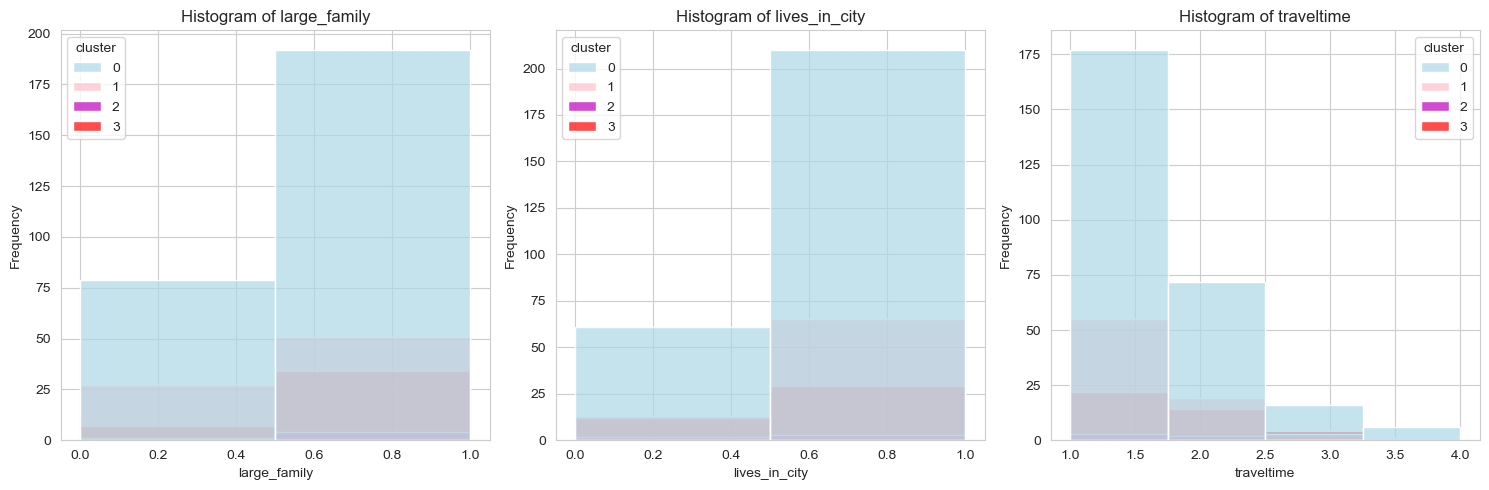

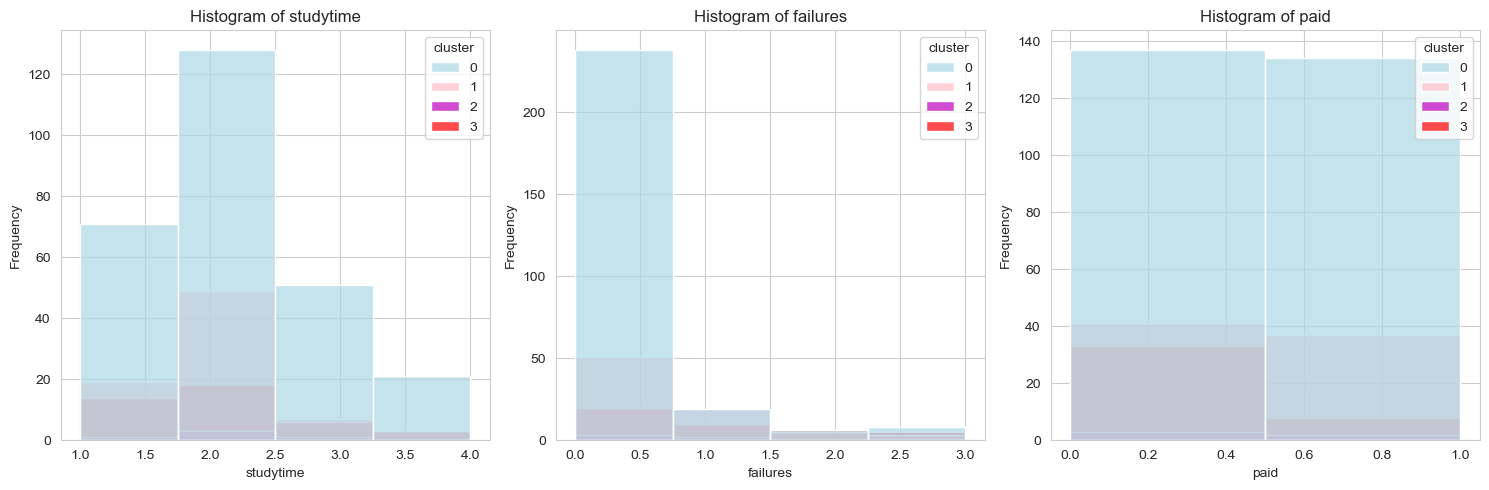

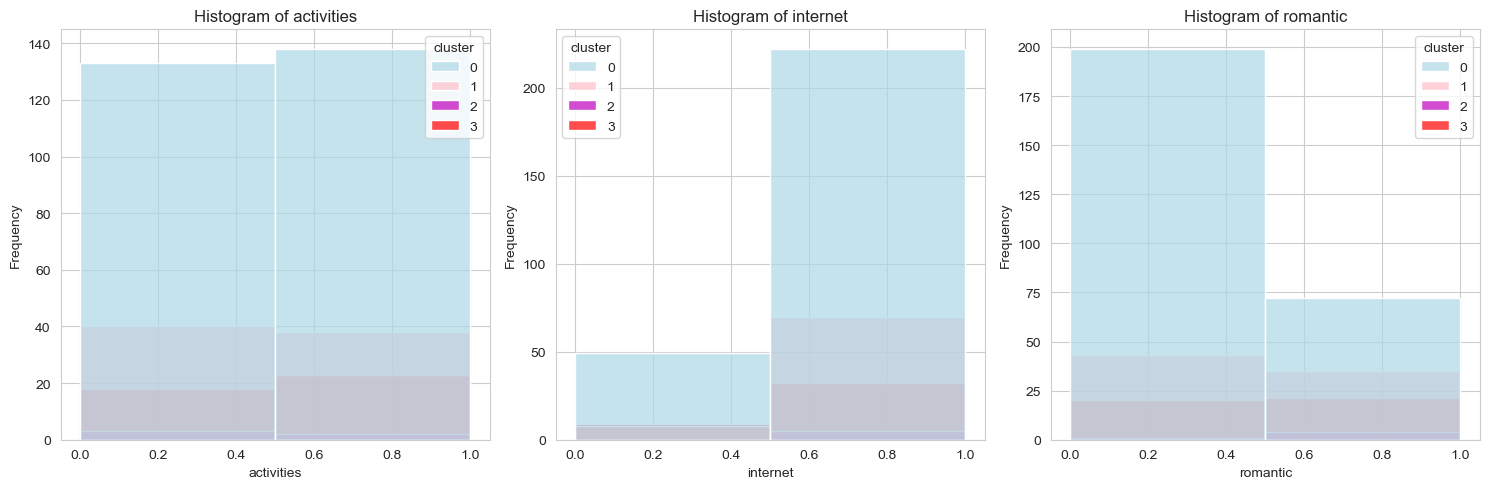

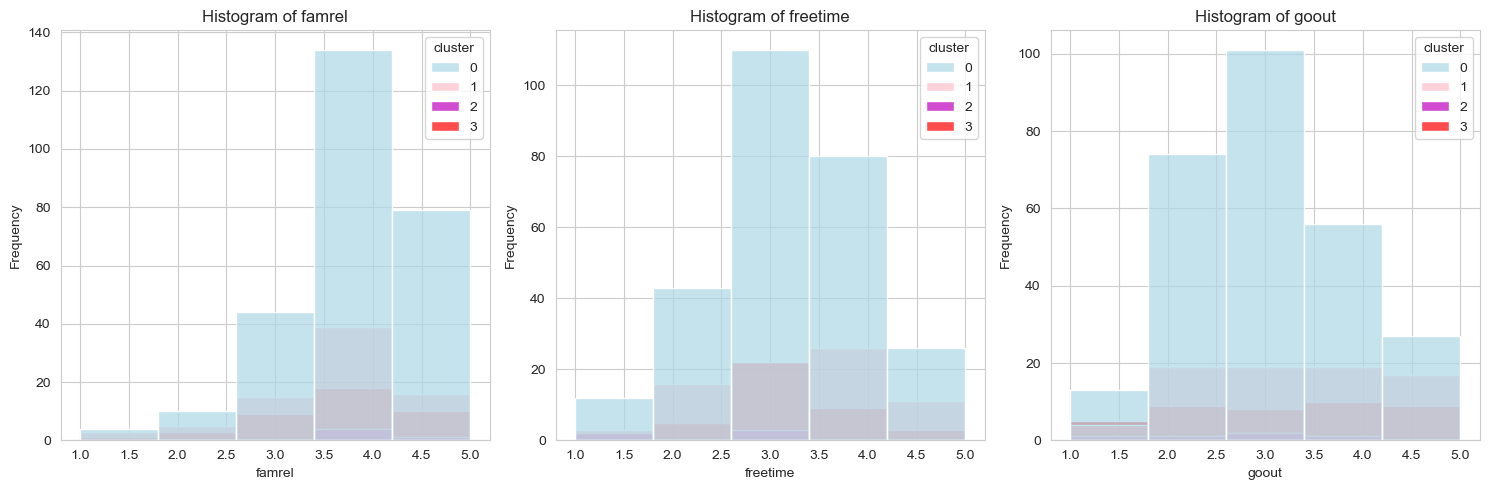

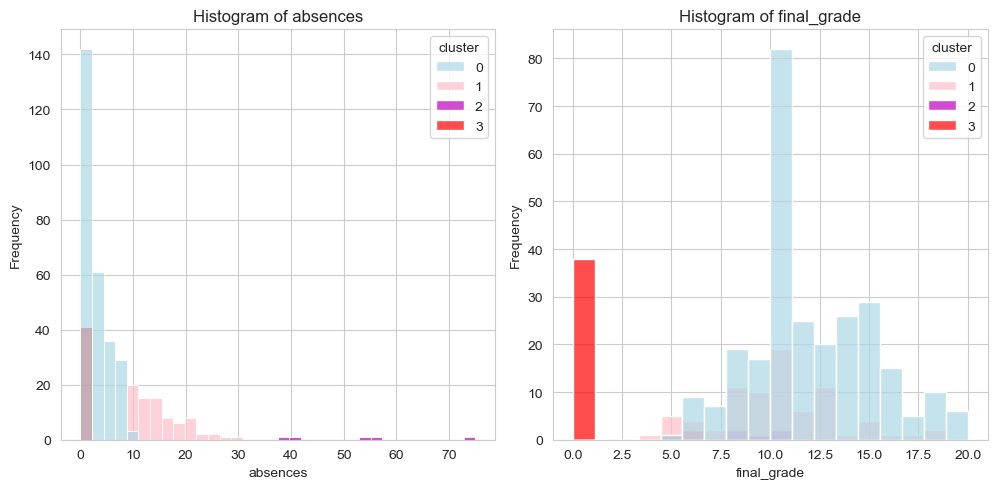

In [50]:

optimal_clusters = 4

# fit model with the optimal number of clusters
km = KMeans(n_clusters=optimal_clusters, n_init = 10)
labels = km.fit_predict(X)

# create a DataFrame with data and cluster labels
with_clusters = X.copy()
with_clusters['cluster'] = labels

num_histograms = 3



variables = with_clusters.columns[:-1]  #leaving out the cluser column

for i in range(0, len(variables), num_histograms):
    plt.figure(figsize=(15, 5))
    for j, variable in enumerate(variables[i:i + num_histograms]):
        plt.subplot(1, num_histograms, j + 1)
        sns.histplot(data=with_clusters, x=variable, bins = len(set(with_clusters[variable])),hue='cluster', kde=False, alpha=0.7,\
                     palette=['lightblue','pink','m','r']) 
        plt.title(f'Histogram of {variable}')
        plt.xlabel(variable)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

By observing the histograms I will attempt to choose the features who's clusters overlap the least. These variables are the most discriminatory.

From the 'absences' histogram I do not observe much overlap between the clusters, infact there is a clear distinction between the cluster zero, one and three. There is some overlap between cluster one and two around the zero absences mark but overall I find absences to be the most discriminatory variable of all features in the dataset.

Outside of 'absences' it becomes more difficult to select the discriminatory variables as many of them have a very small range and are discrete variables. However by looking at the histograms I can select four more features which appear to be more discriminatory that the rest, these features are 'studytime','failures', 'internet' and 'romantic'. These four features appear to have the least overlap in each of the bars on their histograms relative to the other features in the dataset.

So overall I selected 5 features as the most discriminatory, these are: 'studytime', 'failures', 'internet', 'romantic' and 'absences'.

## c)

Below I have created scatter plots for my most discriminatory variables and coloured the points by their cluster.

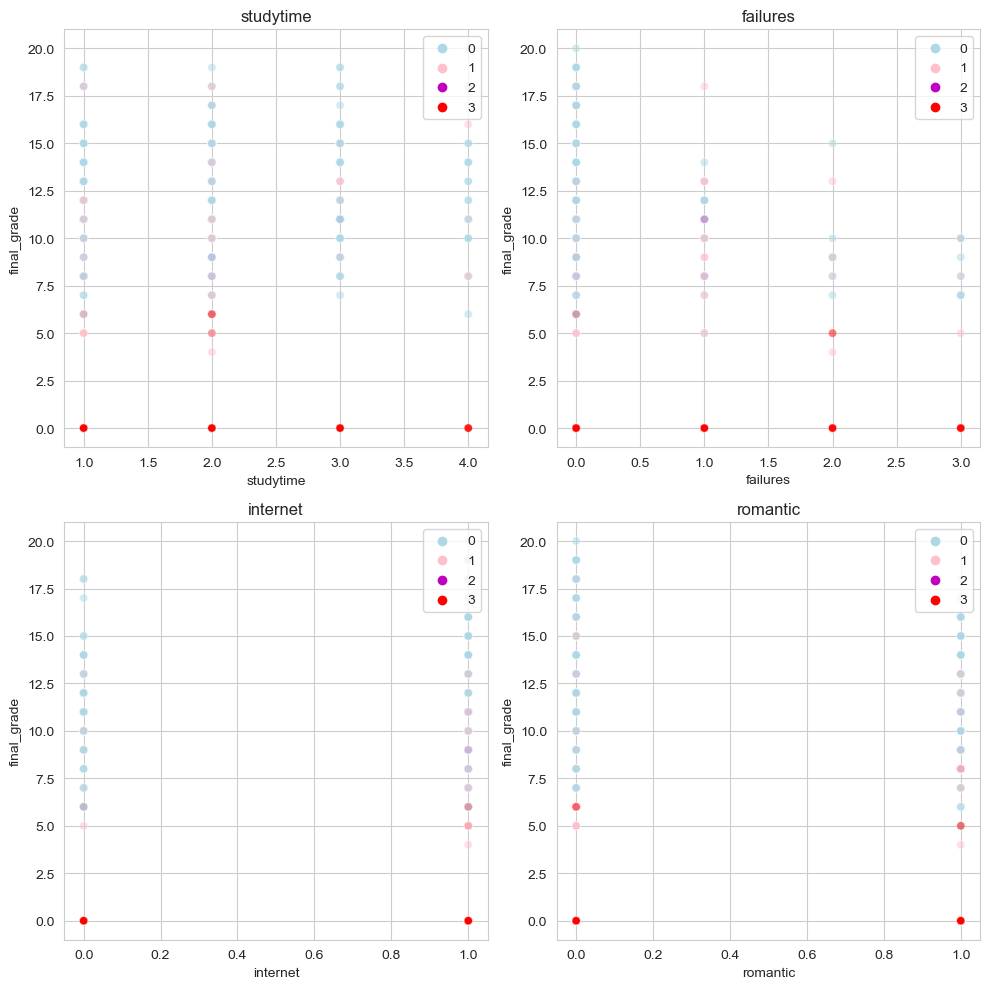

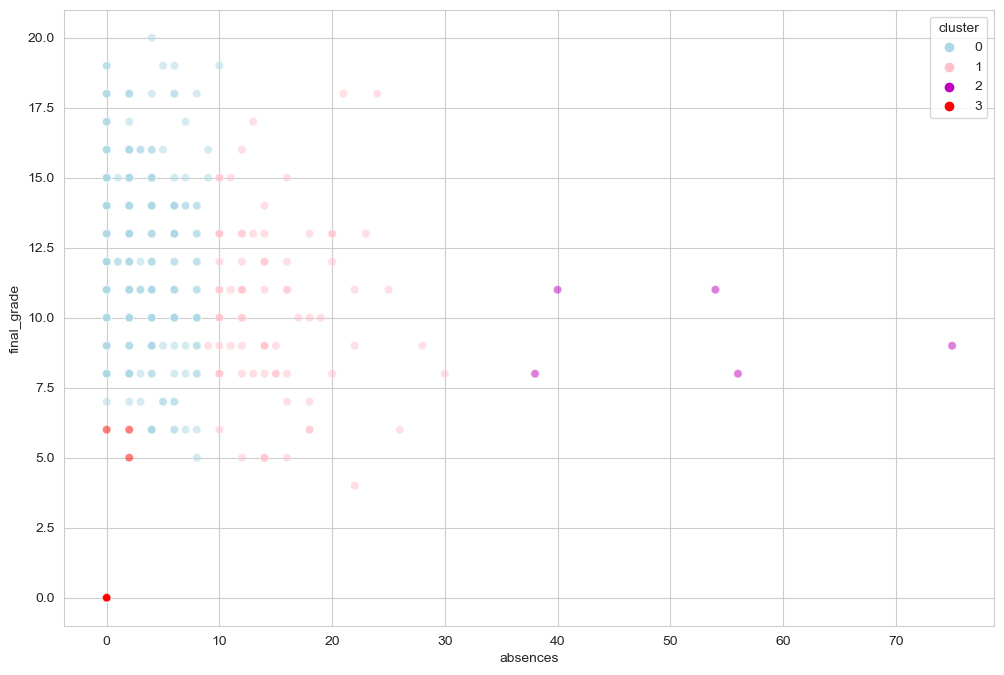

In [51]:
discriminatory = ['studytime', 'failures', 'internet', 'romantic', 'absences']

# Grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

#Plot the first 4 in a grid
axes_flat = axes.flatten() #flatting the axes
# Plotting each scatter plot
for i, col in enumerate(discriminatory[:-1]):
    sns.scatterplot(data=with_clusters, x=col, y='final_grade', hue='cluster', alpha=0.5,  palette=['lightblue','pink','m','r'], ax=axes_flat[i])
    axes_flat[i].set_title(col)
    axes_flat[i].legend(loc='upper right')

plt.tight_layout() # Prevent overlap

plt.show()

#plot the 5th
plt.figure(figsize = (12,8))
sns.scatterplot(data=with_clusters, x=discriminatory[-1], y='final_grade', hue='cluster', alpha=0.5, palette=['lightblue','pink','m','r'])

plt.show()


As you can see from the first four plots, there does not seem to be a clear separation of the data points into different groups. Datapoints of different colours (clusters) appear almost randomly distributed throughout the scatter plots. Therefore, I do not observe multiple groups of students with different characteristics from the first four plots. One reason for this could be the type of the data. As I mentioned before, the numeric values of all variables aside from 'absences' and 'final_grade' represent different ranked groups. When dealing with data that refers to groups (e.g. binary data), K-Means tends to struggle due to its use of Euclidean distance as a dissimilarity measure. So, distinct groups with different characteristics may be hidden within these datasets, which are not found using K-Means.

However, my final plot ('absences') does appear to show some separation between the data points. The data points of 'absences' do not refer to categories for the students and have a much wider range, so I would expect K-Means to work better on this type of variable. As you can see from the plot, there appears to be a group of students with a low absence rate and a score greater than 6 (in general). The second group seems to consist of students who achieved similar results to the first group but had more absences. The third cluster appears to consist of students with low absences but performed worse than group 1 in the final exam. The final group is made of students who scored in the neighbourhood of 50% but had a very high number of absences. 

In my opinion, separation in only one variable is insufficient to suggest that there are multiple groups of students with different properties. However, when analysed using an algorithm better suited to the dataset (the numerical values representing categories), groups may also emerge in other variables. If this were the case, I would conclude that there are groups with multiple different characteristics.


## d)

As I found above, clustering by mean for variables whos means cannot be interpreted (as they refer to ranked groups) can be quite difficult. This is because traditional distance metrics such as Euclidean distance may not be applicable. However, there are other clustering methods which that are more suitable for this kind of data. One example of this would be K-Modes.Clustering.

**Overview of K-Modes**

K-Modes is an extension of K-Means which was developed to tackle the challenges posed by grouped data in clustering. Like K-Means, K-Modes aims to partition the data into a given number of clusters, but it does this using a different dissimilarity measure which is more suitable for grouped data.

The distance metric used by K-Modes is based on the count of mismatched values between data points. In practice, it counts the number of features for which the values are different and calculates a cost based on these differences. Like K-Means the K-Modes works by choosing a random centroid to begin with and iteratively assigning new datapoints to the clusters until convergence. The centroids themselves are different between K-Means and K-Modes, as the name suggests the K-Modes centroid represents the mode (most frequently occuring value in the cluster) of the cluster while in K-Means the centroid represents the mean. 


**Types of problems it works best for**

Given that the centroid and disimilarity measures are based on the differences in counts or frequency of the data points, the K-Modes algorithm is particularly useful for dealing with a datasets like ours which has numeric values which have a small range and refer to ranked groups.

Note:

I know what our data is discrete numeric data, however given that clusering by mean did not produce very useful results I have decided to try treating the data as categorial to see if I can achieve more interesting results. This may not be the case but sometimes a change of approach like this can lead to new insights.

Below I will carry out parts a,b and c again using K-Modes and compare the results to the results of the K-Means clustering.

### a)

The Elbow method of K-Modes involves plotting the cost (sum of dissimilarities) against the number of clusters. Like with K-Means, the "elbow" represents the point where adding an extra cluster doesnt significantly reduce the cost.

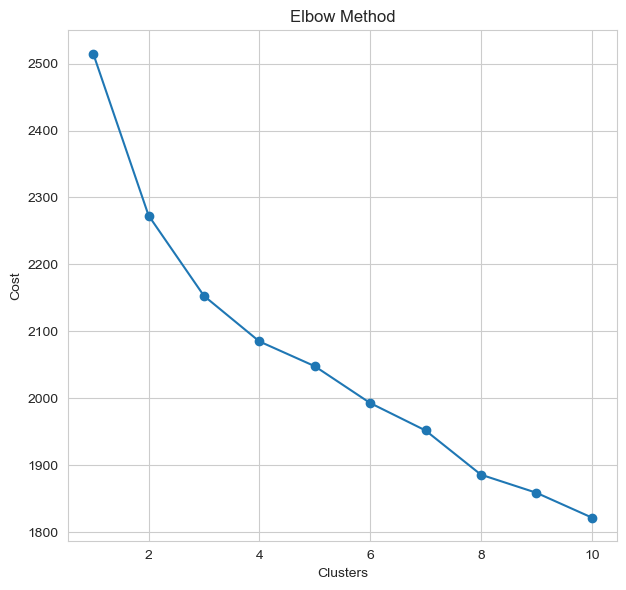

In [52]:
#sing the full dataset, final_grade included
X = data.copy()

#Number of clusters
clusters = range(1, 11)

#Lists to store the performance metrics
costs = []

#Calculating the performance metrics for all number of clusters
for k in clusters:
    # fitting model
    km = KModes(n_clusters=k, init='Huang', n_init=5) 
    km.fit(X)

    costs.append(km.cost_)
    
    
#plot costs (elbow method)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(clusters, costs, marker='o')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Cost')


plt.tight_layout()
plt.show()

Note:
    
n_init is the number of time the algorithm will be run with different centroid initializations, the larger this number is the better the results will be. Typically a value between 1 and 10 is used so I have chosen to use 5.

As you can see k = 4 appears to be the point at which the decrease in cost becomes linear, so I have selected this as my optimal number of clusters. 

### b)

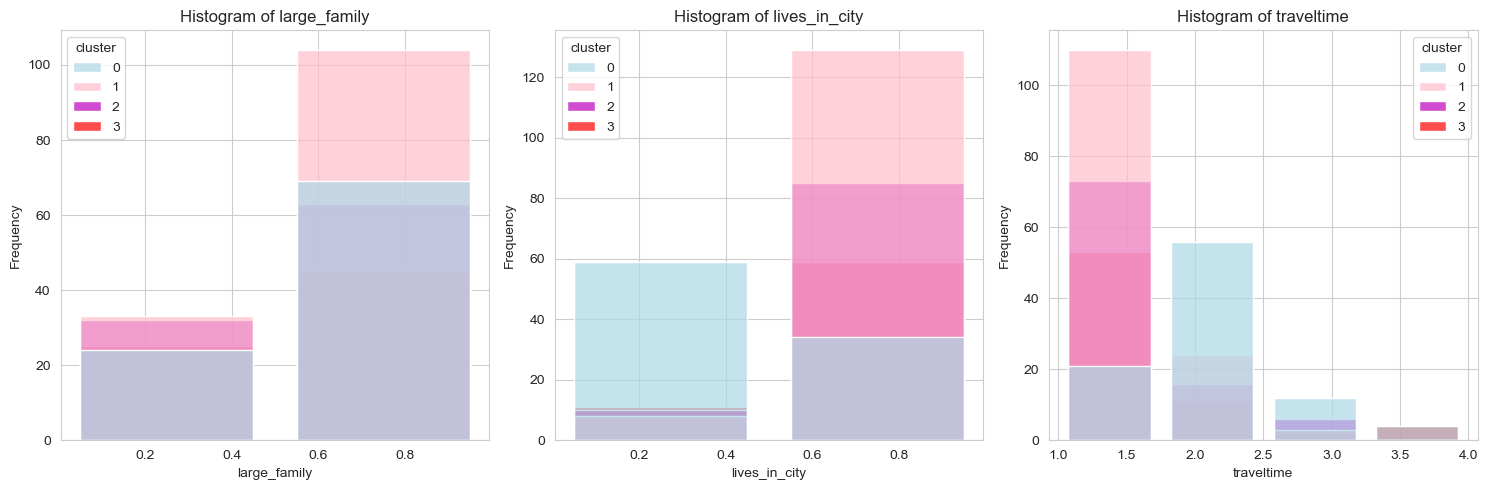

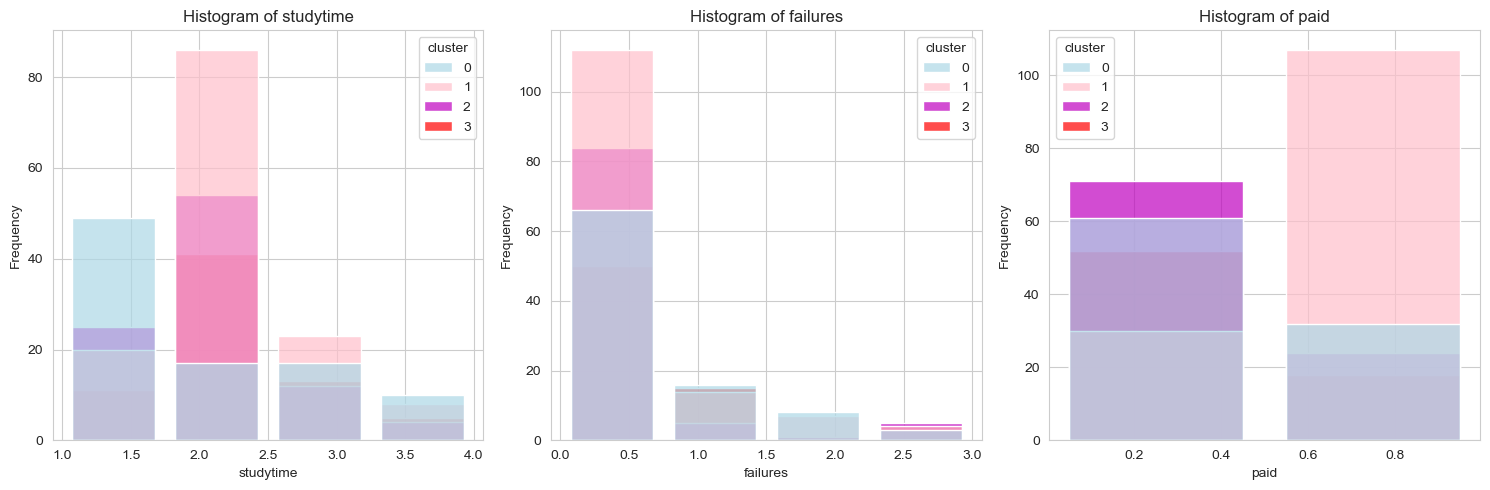

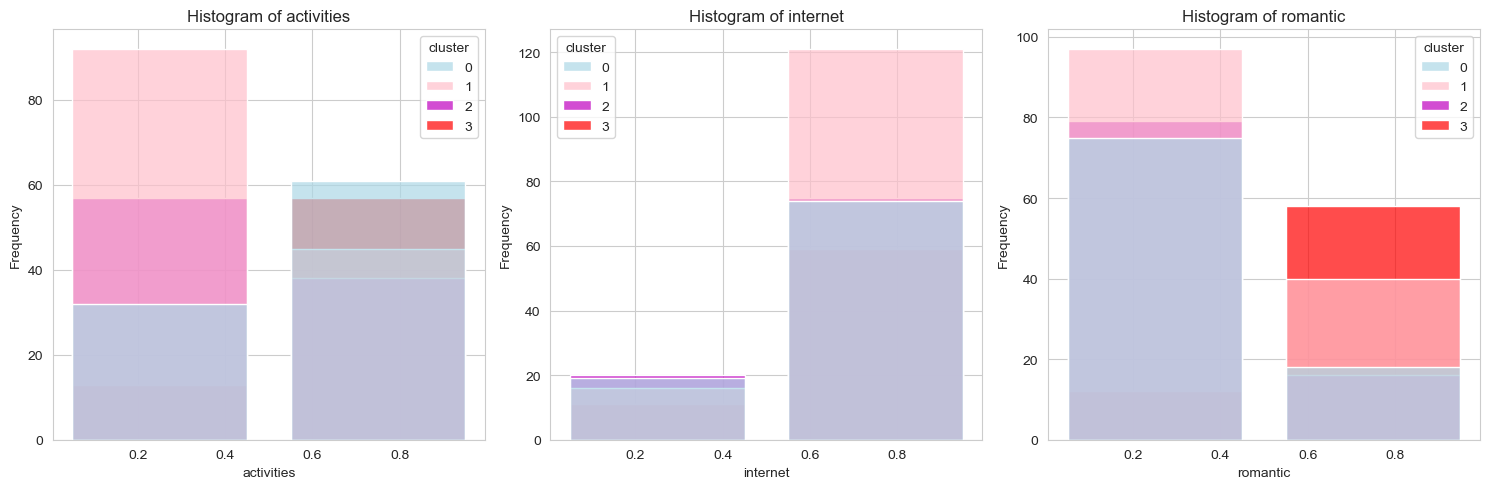

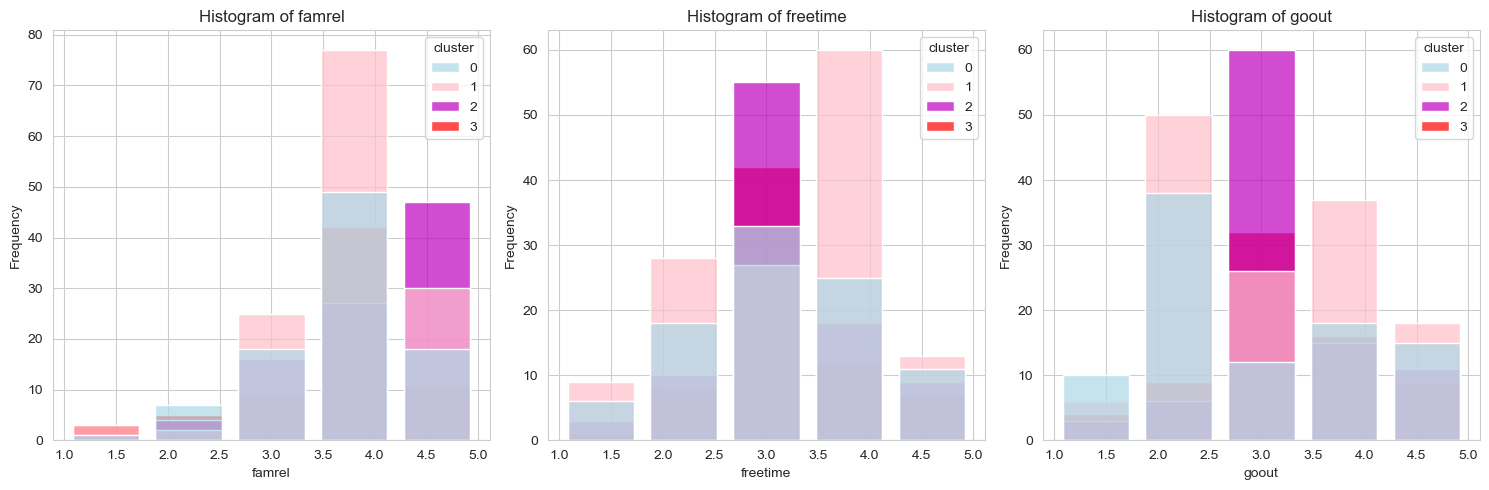

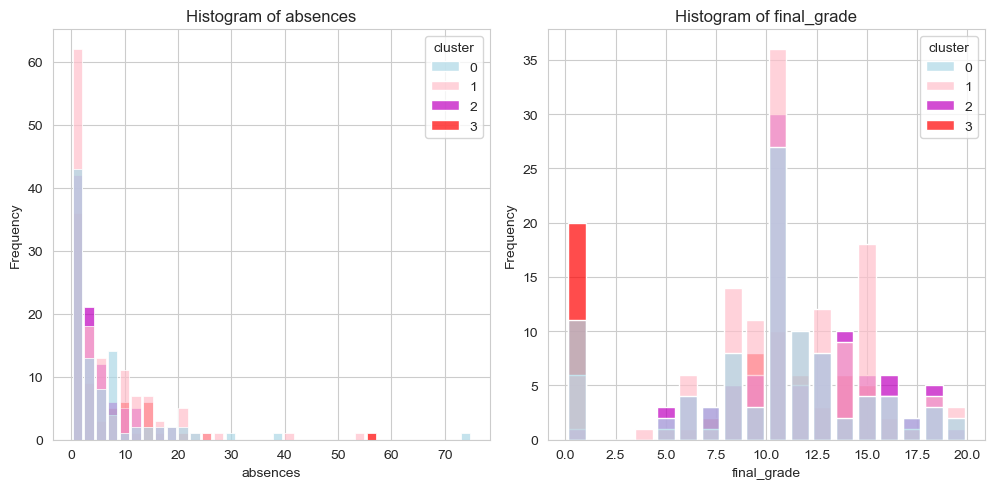

In [53]:
optimal_clusters = 4

# fit model with the optimal number of clusters
km = KModes(n_clusters=optimal_clusters, init='Huang', n_init=5)
labels = km.fit_predict(X)

# create a DataFrame with data and cluster labels
data_with_clusters = X.copy()
data_with_clusters['cluster'] = labels

num_histograms = 3




variables = data_with_clusters.columns[:-1]  #leaving out the cluser column

for i in range(0, len(variables), num_histograms):
    plt.figure(figsize=(15, 5))
    for j, variable in enumerate(variables[i:i + num_histograms]):
        plt.subplot(1, num_histograms, j + 1)
        sns.histplot(data=data_with_clusters, x=variable, bins = len(set(data_with_clusters[variable])),hue='cluster', kde=False, alpha=0.7,\
                     palette=['lightblue','pink','m','r'], shrink = 0.8) 
        plt.title(f'Histogram of {variable}')
        plt.xlabel(variable)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

One thing to note is that since this method works best for variables based on categories, it will not work well for the 'absences' variable. So I am using this alogrithm to see if there is any discrimination in the other variables which was not observed by K-Means.

However, from observing the histograms I was not able to spot any new discriminatory variables. Below I have plotted scatter plots for the four discriminatory variables (not including 'absences') which I found using K-Means to see if this algorithm has done a better job of separating the groups. 

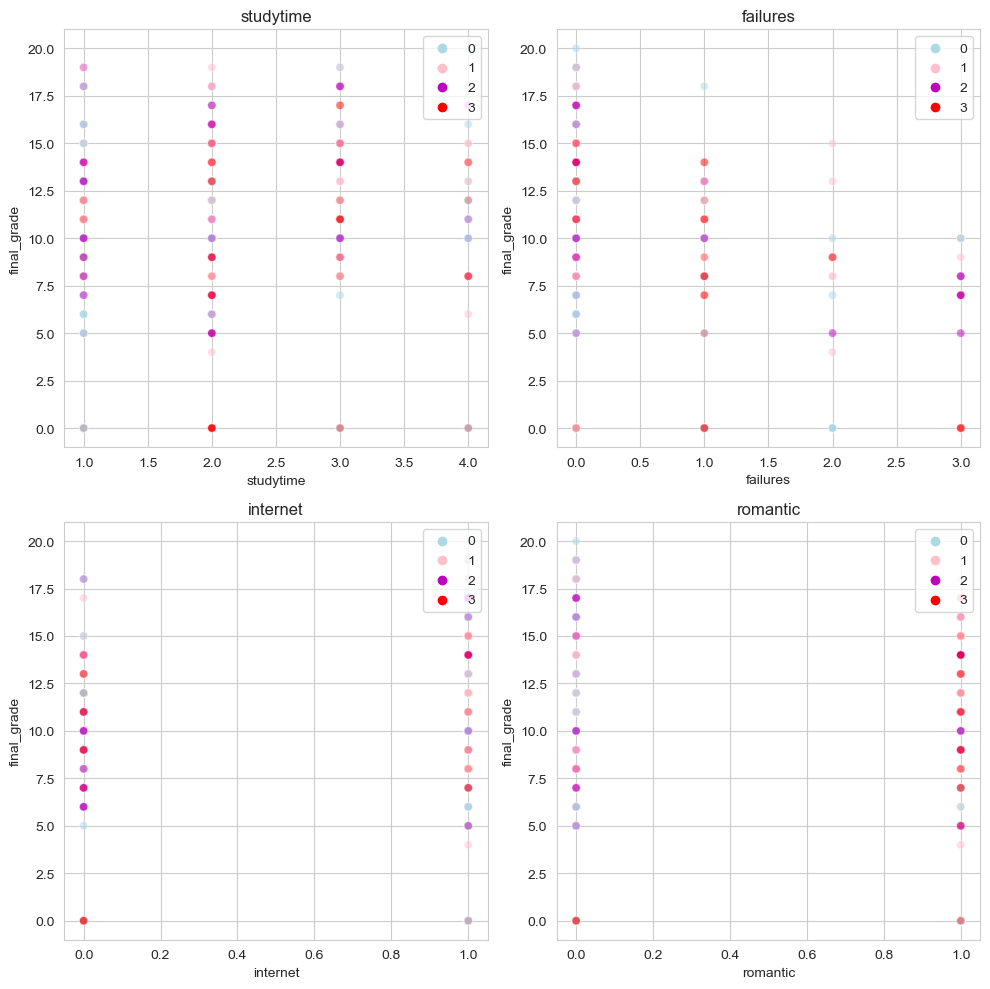

In [54]:
discriminatory = ['studytime', 'failures', 'internet', 'romantic']

# Grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

#Plot the first 4 in a grid
axes_flat = axes.flatten() #flatting the axes
# Plotting each scatter plot
for i, col in enumerate(discriminatory):
    sns.scatterplot(data=data_with_clusters, x=col, y='final_grade', hue='cluster', alpha=0.5,  palette=['lightblue','pink','m','r'], ax=axes_flat[i])
    axes_flat[i].set_title(col)
    axes_flat[i].legend(loc='upper right')

plt.tight_layout() # Prevent overlap

plt.show()

From the plots above there does not appear to be any improvement in the seperation of the datapoints into groups. So following my use of K-Modes clustering, I not been able to expose any new relationships or insights by treating the data as categorical. Therefore, like I mentioned above, there does not appear to be distinct groups with multiple different characteristics within the students. While there was seperation in the 'absences' variable, this is not enough evidence for groups with 'multiple' different characteristics.

# Honour Code

I confirm that all work submitted is my own and that I have neither given, sought, nor received aid in relation to this assignment

Signed:$\newline$
Date: